# Projet Python pour le data scientist : Prévision des prix des Airbnb
#### Réalisé par M.Blazevic, E.Bordais, C.Nadler, C.Voisin

## 0. Import modules et base de données

In [1]:
%pip install shap
%pip install xgboost
%pip install geopandas
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from string import ascii_letters
import itertools
import collections
import nltk
from nltk.corpus import stopwords 
from wordcloud import WordCloud
import warnings
import geopy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import sklearn
import pickle
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
import shap
import plotly.express as px
import geopandas as gpd 


%matplotlib inline


In [3]:

data = pd.read_csv('airbnb-listings3.csv' , sep=';', low_memory= False)
data

ID                            Listing Url       Scrape ID  \
0       7713011   https://www.airbnb.com/rooms/7713011  20170404145355   
1       3335054   https://www.airbnb.com/rooms/3335054  20170404145355   
2      10066518  https://www.airbnb.com/rooms/10066518  20170404145355   
3       8100080   https://www.airbnb.com/rooms/8100080  20170404145355   
4       7397323   https://www.airbnb.com/rooms/7397323  20170404145355   
...         ...                                    ...             ...   
54508   2610162   https://www.airbnb.com/rooms/2610162  20170404145355   
54509  13760682  https://www.airbnb.com/rooms/13760682  20170404145355   
54510   9173969   https://www.airbnb.com/rooms/9173969  20170404145355   
54511  13754942  https://www.airbnb.com/rooms/13754942  20170404145355   
54512   8642835   https://www.airbnb.com/rooms/8642835  20170404145355   

      Last Scraped                                          Name  \
0       2017-04-06                      STUDIO PIGALLE W BALCONY   
1       2017-04-05           Montmartre au pied du Sacré-Coeur !   
2       2017-04-06            LOVELY FLAT MONTMARTRE SACRE COEUR   
3       2017-04-06             Appartement au pied de Montmartre   
4       2017-04-06                 Beautiful and Spacious Studio   
...            ...                                           ...   
54508   2017-04-06           Rue Cler at 500m from Eiffel Tower!   
54509   2017-04-06  Elegant 160m Home in the heart of St Germain   
54510   2017-04-06                 partner service test listing3   
54511   2017-04-06       2 bedroom appartement in a premium area   
54512   2017-04-06           Spacious Room in Charming Apartment   

                                                 Summary  \
0      In the heart of Montmarte Pigalle, this lovely...   
1      Ce studio de 22m2, rénové et équipé avec soin,...   
2      In 2' by walk of the Sacré-Coeur and the Mouli...   
3      Dans un appartement de 50m², à deux minutes du...   
4      Grd studio lumineux de 32m² avec une grande pi...   
...                                                  ...   
54508  Logement très calme, ensoleillé, situé derrièr...   
54509  Our home is in the heart to Saint-Germain-des-...   
54510                             this is a test summary   
54511  Situated in a prestigious area near the Rodin ...   
54512  Spacious bedroom in a beautifully authentic th...   

                                                   Space  \
0      This newly refurbished flat is ideal for a cou...   
1      A studio where it is very pleasant to settle i...   
2      Charmant appartement typiquement parisien avec...   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
54508  Ce logement se trouve au 2e étage et comporte ...   
54509  Our home is a large (160m) classic French apar...   
54510                                                NaN   
54511                                                NaN   
54512  A classic turn of the century apartment in the...   

                                             Description Experiences Offered  \
0      In the heart of Montmarte Pigalle, this lovely...                none   
1      A studio where it is very pleasant to settle i...                none   
2      In 2' by walk of the Sacré-Coeur and the Mouli...                none   
3      Dans un appartement de 50m², à deux minutes du...                none   
4      Grd studio lumineux de 32m² avec une grande pi...                none   
...                                                  ...                 ...   
54508  Logement très calme, ensoleillé, situé derrièr...                none   
54509  Our home is in the heart to Saint-Germain-des-...                none   
54510                             this is a test summary                none   
54511  Situated in a prestigious area near the Rodin ...         

On supprime les features qui ne sont pas utiles

In [4]:
df = data.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Summary', 
              'Experiences Offered', 'Thumbnail Url', 'House Rules', 'Medium Url',
              'Picture Url', 'XL Picture Url', 'Host URL', 'Host Location', 
              'Host About', 'Host Acceptance Rate', 'Host Thumbnail Url', 
              'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count',
               'Host Verifications','Neighbourhood Group Cleansed', 'State', 
                'Market', 'Smart Location', 'Country Code', 'Country', 
               'Calendar last Scraped', 'First Review', 'Last Review', 
                'Jurisdiction Names', 'Features', 'License', 'Interaction', 'Host Name',
                'Monthly Price', 'Weekly Price'
               ], axis=1)

In [5]:
df.head()

Name  \
0             STUDIO PIGALLE W BALCONY   
1  Montmartre au pied du Sacré-Coeur !   
2   LOVELY FLAT MONTMARTRE SACRE COEUR   
3    Appartement au pied de Montmartre   
4        Beautiful and Spacious Studio   

                                               Space  \
0  This newly refurbished flat is ideal for a cou...   
1  A studio where it is very pleasant to settle i...   
2  Charmant appartement typiquement parisien avec...   
3                                                NaN   
4                                                NaN   

                                         Description  \
0  In the heart of Montmarte Pigalle, this lovely...   
1  A studio where it is very pleasant to settle i...   
2  In 2' by walk of the Sacré-Coeur and the Mouli...   
3  Dans un appartement de 50m², à deux minutes du...   
4  Grd studio lumineux de 32m² avec une grande pi...   

                               Neighborhood Overview  \
0  It is central enough for you to walk your way ...   
1  The apartment is located rue d'Orsel just belo...   
2  Situé en plein quartier Montmartre, vous serez...   
3                                                NaN   
4                                                NaN   

                                               Notes  \
0  Real globetrotters, we are real Parisians with...   
1  The building has a digital code and intercom. ...   
2  Situé en plein quartier Montmartre, vous serez...   
3                                                NaN   
4                                                NaN   

                                             Transit  \
0  The flat is ideally located in Montmartre Piga...   
1  The studio is easily accessible. At the foot o...   
2  Très bien desservi par les transports en commu...   
3                                                NaN   
4                                                NaN   

                                              Access   Host ID  Host Since  \
0  Subway stations: Abbesses or Pigalle. Bus, Tax...  32492446  2015-05-03   
1  The kitchen is equipped with a refrigerator, t...   2726446  2012-06-24   
2                                                NaN  30432969  2015-04-01   
3                                                NaN  42773335  2015-08-28   
4                                                NaN  38757332  2015-07-17   

   Host Response Time  ...  Review Scores Accuracy  Review Scores Cleanliness  \
0      within an hour  ...                     9.0                        9.0   
1                 NaN  ...                    10.0                       10.0   
2  within a few hours  ...                    10.0                       10.0   
3  within a few hours  ...                    10.0                       10.0   
4      within an hour  ...                    10.0                        9.0   

  Review Scores Checkin Review Scores Communication Review Scores Location  \
0                   9.0                         9.0                    8.0   
1                  10.0                        10.0                   10.0   
2                  10.0                        10.0                   10.0   
3                  10.0                        10.0                   10.0   
4                   9.0                        10.0                    8.0   

  Review Scores Value Cancellation Policy  Calculated host listings count  \
0                 9.0              strict                               7   
1                10.0            moderate                               1   
2                10.0            moderate                               2   
3                 9.0            flexible                               1   
4                10.0            flexible                               1   

   Reviews per Month                            Geolocation  
0               1.84   48.88292573377615,2.3358125139068453  
1               0.03    48.88301302713629,2.343468625865973  
2               0.89  

On a donc maintenant 55 features

In [6]:
df.columns

Index(['Name', 'Space', 'Description', 'Neighborhood Overview', 'Notes',
       'Transit', 'Access', 'Host ID', 'Host Since', 'Host Response Time',
       'Host Response Rate', 'Host Total Listings Count', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed', 'City', 'Zipcode',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet',
       'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count',

## 1. Statistiques descriptives de la base de données 

### 1.0 Premières statistiques

In [7]:
#On abandonne les colonnes où les prix sont nuls pour éviter de fausser l'analyse
df=df[df['Price']!=0]

In [8]:
df['Price'].describe()

count    54458.000000
mean        94.789159
std         73.357259
min          8.000000
25%         55.000000
50%         75.000000
75%        107.000000
max        999.000000
Name: Price, dtype: float64

On remarque que le prix moyen par nuit est de 94€, avec un prix minimal de 8€, qui paraît assez incohérent avec les tarifs habituels.

Traçons la répartition des prix des Airbnb parisiens

Text(0, 0.5, 'Quantité')

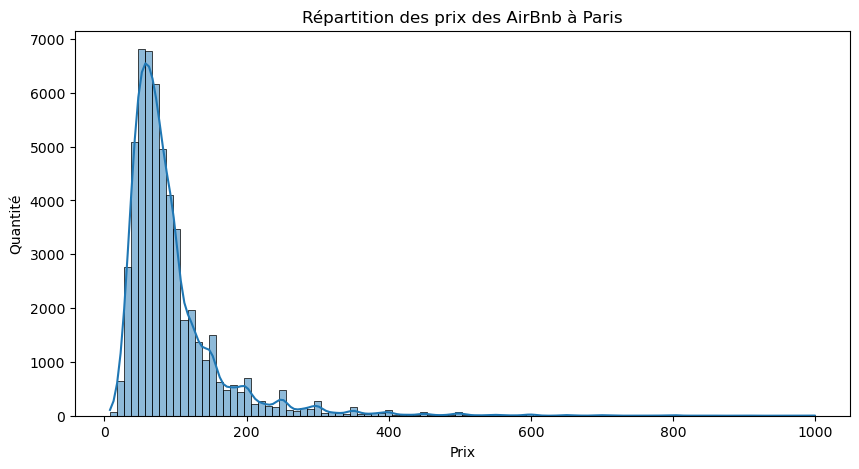

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df['Price'], kde=True, bins=int(100))
plt.title ('Répartition des prix des AirBnb à Paris')
plt.xlabel('Prix')
plt.ylabel('Quantité')

In [10]:
#Pourcentage des airbnb ayant un prix inférieur à 200€
len(df.loc[df['Price']<200])/len(df) * 100

93.09142941003815

On observe que la plus grande partie (environ 93%) des AirBnb ont un prix inférieur à 200€ par nuit.  Traçons désormais les distributions de prix en dessous et au dessus de ce seuil. 

Text(0.5, 1.0, 'Distribution des prix supérieurs à 200 euros')

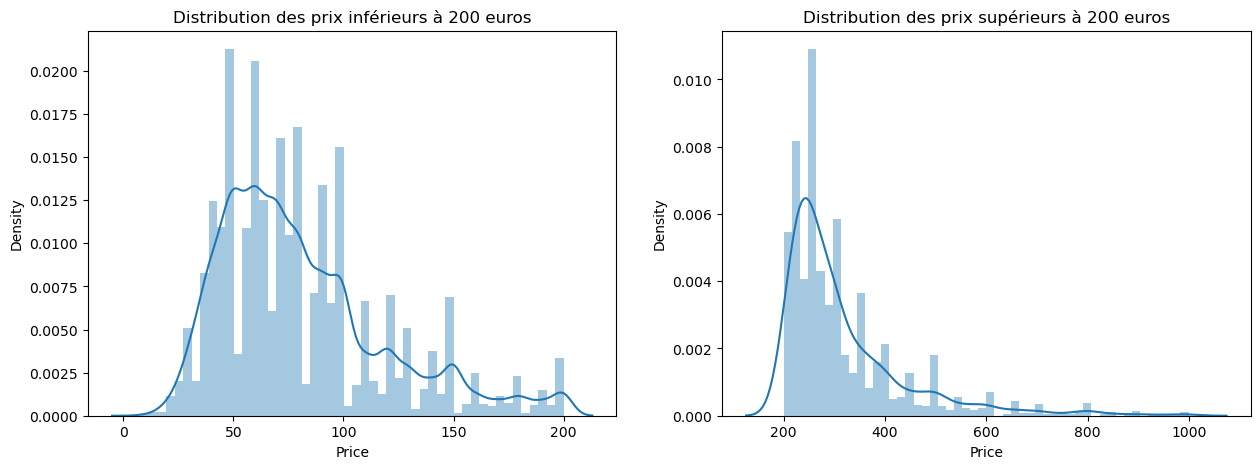

In [11]:
warnings.simplefilter('ignore')

fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

ax0 = sns.distplot(df[df['Price'] <= 200]['Price'], ax=axs[0])
ax0.set_title('Distribution des prix inférieurs à 200 euros')

ax1 = sns.distplot(df[df['Price'] > 200]['Price'], ax=axs[1])
ax1.set_title('Distribution des prix supérieurs à 200 euros')

Qu'est ce qui influence le plus le prix d'un Airbnb ? 
Nous avons naturellement pensé à plusieurs axes tels que : 
- sa taille : nombre de chambres, de personnes qu'il peut accueillir, superficie
- sa localisation : quartier 
- qualité de l'hébergement : matériel et services disponibles
- qualité de l'hôte


##### Quelles sont les variables les plus corrélées au prix ?

In [12]:
#on ne garde que les variables numériques
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

Host ID  Host Response Rate  Host Total Listings Count   Latitude  \
0  32492446               100.0                        7.0  48.882926   
1   2726446                 NaN                        1.0  48.883013   
2  30432969                95.0                        2.0  48.884043   
3  42773335               100.0                        1.0  48.885195   
4  38757332               100.0                        1.0  48.894800   

   Longitude  Accommodates  Bathrooms  Bedrooms  Beds  Square Feet  ...  \
0   2.335813             2        1.0       0.0   1.0          NaN  ...   
1   2.343469             2        1.0       0.0   1.0          NaN  ...   
2   2.340604             2        1.0       1.0   1.0          NaN  ...   
3   2.345101             2        1.0       1.0   1.0          NaN  ...   
4   2.330055             2        1.0       0.0   1.0          NaN  ...   

   Number of Reviews  Review Scores Rating  Review Scores Accuracy  \
0                 37                  85.0                     9.0   
1                  1                 100.0                    10.0   
2                 13                  97.0                    10.0   
3                  3                  87.0                    10.0   
4                  2                  90.0                    10.0   

   Review Scores Cleanliness  Review Scores Checkin  \
0                        9.0                    9.0   
1                       10.0                   10.0   
2                       10.0                   10.0   
3                       10.0                   10.0   
4                        9.0                    9.0   

   Review Scores Communication  Review Scores Location  Review Scores Value  \
0                          9.0                     8.0                  9.0   
1                         10.0                    10.0                 10.0   
2                         10.0                    10.0                 10.0   
3                         10.0                    10.0                  9.0   
4                         10.0                     8.0                 10.0   

   Calculated host listings count  Reviews per Month  
0                               7               1.84  
1                               1               0.03  
2                               2               0.89  
3                               1               0.17  
4                               1               0.11  

[5 rows x 32 columns]

<AxesSubplot:>

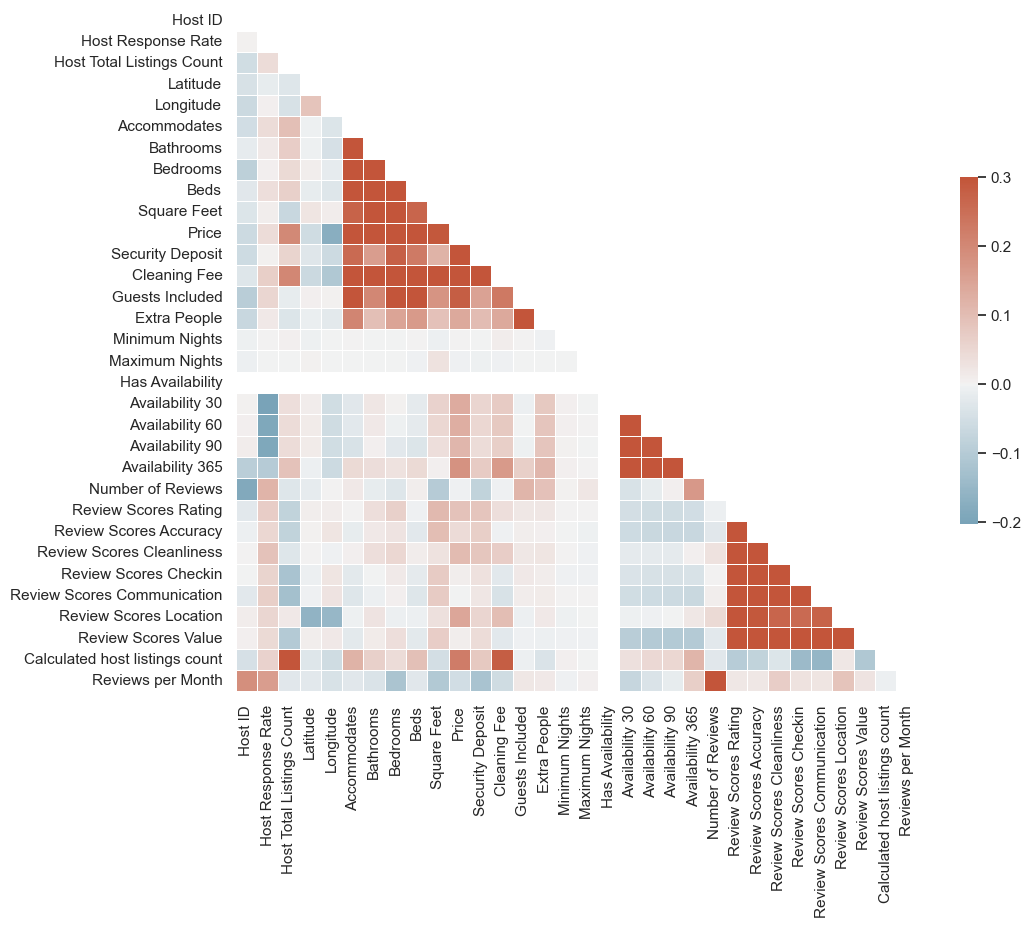

In [13]:
sns.set_theme(style="white")

# Matrice de corrélation
corr = df_num.corr()

# Génération d'un masque pour la partie supérieure du triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Mise en place de la figure
f, ax = plt.subplots(figsize=(11, 9))

# Création d'une palette de couleurs
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Tracé de la heatmap avec le masque et les bonnes dimensions
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
#Variables numériques les plus corrélées avec le prix

var_corr = df_num.corr()['Price']
var = var_corr[abs(var_corr) > 0.2].sort_values(ascending=False)
print("Voici les {} variables les plus fortement corrélées avec le prix par nuit (en ignorant la variable 'Price'):\n{}".format(len(var), var))

Voici les 10 variables les plus fortement corrélées avec le prix par nuit (en ignorant la variable 'Price'):
Price                             1.000000
Cleaning Fee                      0.606410
Accommodates                      0.578680
Bedrooms                          0.548549
Beds                              0.506751
Bathrooms                         0.465715
Security Deposit                  0.375173
Square Feet                       0.293823
Guests Included                   0.281018
Calculated host listings count    0.222991
Name: Price, dtype: float64


Ainsi, les variables les plus corrélées au prix sont les frais de nettoyage, la capacité d'accueil, le nombre de chambres, de lits et de salles de bain, la caution, la superficie de l'appartement, le nombre d'invités inclus dans l'annonce de base, le nombre d'annonces de l'hôte, ainsi que l'arrondissement.

### 1.1 Influence de la localisation

In [15]:
df.columns

Index(['Name', 'Space', 'Description', 'Neighborhood Overview', 'Notes',
       'Transit', 'Access', 'Host ID', 'Host Since', 'Host Response Time',
       'Host Response Rate', 'Host Total Listings Count', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed', 'City', 'Zipcode',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet',
       'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count',

Après une rapide analyse, on se rend compte que la variable Neighbourhood Cleansed est moins précise que Neighbourhood
(20 valeurs contre 64) mais elle semble éliminer certaines erreurs et doublons (par exemple, le quartier Cannesqui qui n'existe pas, le 15ème arrondissement qui groupe avec d'autre quartiers...). On utilisera donc cette variable là. 

In [16]:
df['Neighbourhood Cleansed'].describe()

count                 54512
unique                   20
top       Buttes-Montmartre
freq                   6315
Name: Neighbourhood Cleansed, dtype: object

In [17]:
#On produit un tableau qui indique le nombre et le prix moyen des Airbnb par quartier
df_nb = df.groupby('Neighbourhood Cleansed').agg({'Neighbourhood Cleansed':'count', 'Price':'mean'})
df_nb.columns = ['count', 'mean_price']
df_nb.reset_index(inplace=True)
df_nb.sort_values('count', ascending=False, ignore_index=True, inplace=True)

In [18]:
df_nb

Neighbourhood Cleansed  count  mean_price
0       Buttes-Montmartre   6315   74.813243
1              Popincourt   5381   79.487546
2               Vaugirard   4000   90.633567
3                Entrepôt   3749   82.779616
4     Batignolles-Monceau   3547   88.391819
5            Ménilmontant   2981   65.175444
6         Buttes-Chaumont   2951   66.420285
7                   Passy   2895  123.859570
8                   Opéra   2391   98.421757
9                  Temple   2368  120.041807
10           Observatoire   2161   80.929434
11                Reuilly   2156   77.828770
12               Panthéon   1989  109.756036
13               Gobelins   1940   72.221764
14         Hôtel-de-Ville   1927  131.277778
15             Luxembourg   1846  142.119913
16         Palais-Bourbon   1708  138.534311
17                 Bourse   1620  111.389988
18                 Élysée   1459  152.751381
19                 Louvre   1128  139.022183

On s'aperçoit donc que les prix varient fortement entre les différents quartiers de Paris. On s'intéresse désormais au prix par arrondissement, pour ensuite faire de la visualisation sur carte. 

In [19]:
#Toutes les valeurs prises par la variable Zipcode
df['Zipcode'].unique()

array(['75018', '75004', '75003', '75017', nan, '75019', '75020', '75007',
       '75015', '75006', '75010', '75009', '93300', '75012', '75011',
       '75008', '75013', '75005', '75002', '75001', '75014', '75116',
       '75016', '750018', '92130', '75', '75011\r\n75011', 'Paris 75004',
       '92300', '75000', '94250', '94160', '76016', '75011 PARIS',
       '92100', '750109', '7015', '92240', '92200', 'adf', 'Paris',
       '700014', '75 018', '93310', '75014\r\n75014', 'Montmartre',
       '750016', '075016', '93170', '75003\r\n75003', '78005', '78008',
       '75018e', '75106', '92170'], dtype=object)

On remarque que il y a beaucoup d'imperfections sur cette variable, il faut donc la nettoyer : 
- enlever les Airbnb situés en banlieue (zipcode commencant par 92, 94, ...) 
- regrouper les 75018.0 et 75018 

In [20]:
#on créé la variable arrondissement, on lui donne la valeur 0 par défaut
df['Arrondissement']=0

In [21]:
#on attribue la bonne valeur à la variable arrondissement

df.loc[df["Zipcode"]=="75001", "Arrondissement"] = 1
df.loc[df["Zipcode"]=="75001.0", "Arrondissement"] = 1
df.loc[df["Zipcode"]=="75002", "Arrondissement"] = 2
df.loc[df["Zipcode"]=="75002.0", "Arrondissement"] = 1
df.loc[df["Zipcode"]=="75003", "Arrondissement"] = 3
df.loc[df["Zipcode"]=="75003.0", "Arrondissement"] = 3
df.loc[df["Zipcode"]=="75004", "Arrondissement"] = 4
df.loc[df["Zipcode"]=="75004.0", "Arrondissement"] = 4
df.loc[df["Zipcode"]=="75005", "Arrondissement"] = 5
df.loc[df["Zipcode"]=="75005.0", "Arrondissement"] = 5
df.loc[df["Zipcode"]=="75006", "Arrondissement"] = 6
df.loc[df["Zipcode"]=="75006.0", "Arrondissement"] = 6
df.loc[df["Zipcode"]=="75007", "Arrondissement"] = 7
df.loc[df["Zipcode"]=="75007.0", "Arrondissement"] = 7
df.loc[df["Zipcode"]=="75008", "Arrondissement"] = 8
df.loc[df["Zipcode"]=="75008.0", "Arrondissement"] = 8
df.loc[df["Zipcode"]=="75009", "Arrondissement"] = 9
df.loc[df["Zipcode"]=="75009.0", "Arrondissement"] = 9
df.loc[df["Zipcode"]=="75010", "Arrondissement"] = 10
df.loc[df["Zipcode"]=="75010.0", "Arrondissement"] = 10
df.loc[df["Zipcode"]=="75011", "Arrondissement"] = 11
df.loc[df["Zipcode"]=="75011.0", "Arrondissement"] = 11
df.loc[df["Zipcode"]=="75012", "Arrondissement"] = 12
df.loc[df["Zipcode"]=="75012.0", "Arrondissement"] = 12
df.loc[df["Zipcode"]=="75013", "Arrondissement"] = 13
df.loc[df["Zipcode"]=="75013.0", "Arrondissement"] = 13
df.loc[df["Zipcode"]=="75014", "Arrondissement"] = 14
df.loc[df["Zipcode"]=="75014.0", "Arrondissement"] = 14
df.loc[df["Zipcode"]=="75015", "Arrondissement"] = 15
df.loc[df["Zipcode"]=="75015.0", "Arrondissement"] = 15
df.loc[df["Zipcode"]=="75016", "Arrondissement"] = 16
df.loc[df["Zipcode"]=="75016.0", "Arrondissement"] = 16      
df.loc[df["Zipcode"]=="75116", "Arrondissement"] = 16
df.loc[df["Zipcode"]=="75116.0", "Arrondissement"] = 16               
df.loc[df["Zipcode"]=="75017", "Arrondissement"] = 17
df.loc[df["Zipcode"]=="75017.0", "Arrondissement"] = 17           
df.loc[df["Zipcode"]=="75018", "Arrondissement"] = 18
df.loc[df["Zipcode"]=="75018.0", "Arrondissement"] = 18    
df.loc[df["Zipcode"]=="75019", "Arrondissement"] = 19
df.loc[df["Zipcode"]=="75019.0", "Arrondissement"] = 19   
df.loc[df["Zipcode"]=="75020", "Arrondissement"] = 20
df.loc[df["Zipcode"]=="75020.0", "Arrondissement"] = 20 

In [22]:
df['Arrondissement'].unique()

array([18,  4,  3, 17,  0, 19, 20,  7, 15,  6, 10,  9, 12, 11,  8, 13,  5,
        2,  1, 14, 16], dtype=int64)

In [23]:
#on enlève tous les Airbnb qui n'ont pas été affectés à une valeur
df = df[df['Arrondissement']> 0]

Commentaire : on avait auparavant 54513 lignes dans le dataframe, on en a désormais 53731, on a donc perdu 800 données en nettoyant la variable liée aux arrondissements. Cette perte n'est pas significative. 

In [24]:
#On affiche le nombre d'airbnb et le prix moyen des airbnb par arrondissement
df_arr = df.groupby('Arrondissement').agg({'Arrondissement':'count', 'Price':'mean'})
df_arr.columns = ['Count', 'Mean_price']
df_arr.reset_index(inplace=True)
df_arr.sort_values('Mean_price', ascending=False, ignore_index=True, inplace=True)

In [25]:
df_arr

Arrondissement  Count  Mean_price
0                8   1378  155.957571
1                6   1833  141.838798
2                1   1102  141.251589
3                7   1613  139.501863
4                4   1922  131.503904
5               16   2838  124.385785
6                3   2198  119.395814
7                2   1582  110.968987
8                5   1998  109.642464
9                9   2375   99.129318
10              15   3951   90.788301
11              17   3520   88.625462
12              10   3782   83.361016
13              14   2134   81.682652
14              11   5312   80.318019
15              12   2134   76.927332
16              18   6260   74.692234
17              13   1915   72.086729
18              19   2843   66.720423
19              20   3040   65.171053

On remarque que les arrondissements les plus chers de Paris sont le 8e, le 6e et le 1er. On décide de visualiser sur une carte les prix, afin de mieux comprendre cette distribution.

Pour la visualisation par carte, on doit d'abord télécharger un fichier geojson qui délimite les arrondissements parisiens. Ensuite, on le superpose à une carte de Paris et grâce à mapbox on peut la rendre interactive et afficher les données. 

In [26]:
geojson = gpd.read_file('arrondissements.geojson')

Le fichier geojson est un dataframe avec des informations géographiques. On peut donc le fusionner avec le dataframe df_arr qui regroupe le prix moyen des Airbnb par arrondissement. 

In [27]:
geojson.head()

c_ar              l_aroff       surface        l_ar    n_sq_co  c_arinsee  \
0     2               Bourse  9.911537e+05   2ème Ardt  750001537      75102   
1    10             Entrepôt  2.891739e+06  10ème Ardt  750001537      75110   
2    17  Batignolles-Monceau  5.668835e+06  17ème Ardt  750001537      75117   
3     7       Palais-Bourbon  4.090057e+06   7ème Ardt  750001537      75107   
4     6           Luxembourg  2.153096e+06   6ème Ardt  750001537      75106   

     n_sq_ar     perimetre                                           geometry  
0  750000002   4554.104360  POLYGON ((2.35152 48.86443, 2.35095 48.86341, ...  
1  750000010   6739.375055  POLYGON ((2.36469 48.88437, 2.36485 48.88436, ...  
2  750000017  10775.579516  POLYGON ((2.29517 48.87396, 2.29504 48.87378, ...  
3  750000007   8099.424883  POLYGON ((2.32090 48.86306, 2.32094 48.86305, ...  
4  750000006   6483.686786  POLYGON ((2.34459 48.85405, 2.34428 48.85375, ...

In [28]:
df_final = geojson.merge(df_arr, left_on="c_ar", right_on="Arrondissement", how="outer")

In [29]:
fig1 = px.choropleth_mapbox(df_final, locations = 'Arrondissement',
                            featureidkey = 'properties.c_ar',
                            geojson= geojson,
                            color=df_final['Mean_price'],
                            color_continuous_scale="PuRd",
                            range_color=[65,155],
                            hover_name='Arrondissement',
                            hover_data=['Mean_price'],
                            labels = {'Mean_price' : "Prix moyen par nuit"},
                            title="Prix des Airbnb par arrondissement",
                            mapbox_style="open-street-map",
                            center= {'lat':48.866669, 'lon':2.33333},
                            zoom =10.5, 
                            opacity= 0.6)

fig1.show()

Les différences de prix selon les arrondissements sont-elles liées à la différence des prix de l'immobilier ? Pour répondre à cette question, nous créons une comparaison avec les loyers parisiens à partir d'une base de données scrapée sur Superimmo, qui regroupe toutes les logements disponibles à la location à Paris et publiés sur ce site, soit un millier. 

In [30]:
loy = pd.read_csv('loyers.csv')

In [31]:
loy = loy[loy['Loyer (€)'] < 20000]

In [32]:
loy['Loyer par m²'] = loy['Loyer (€)'] / loy['Surface (m²)']

In [33]:
loy.describe()

Code postal  Arrrondissement     Loyer (€)  Surface (m²)  Loyer par m²
count   1294.000000      1294.000000   1294.000000   1292.000000   1292.000000
mean   75015.451314        15.451314   2283.823802     62.751130     39.861806
std       17.160730        17.160730   2069.083780     47.484942     35.573851
min    75001.000000         1.000000    100.000000      1.000000      1.652000
25%    75009.000000         9.000000   1200.000000     34.442500     30.371622
50%    75014.000000        14.000000   1650.000000     50.200000     34.338235
75%    75017.000000        17.000000   2500.000000     73.000000     40.161255
max    75116.000000       116.000000  18400.000000    500.000000    520.000000

In [34]:
loy_nb = loy.groupby('Arrrondissement').agg({'Arrrondissement' : 'count',
                                          'Loyer (€)' : 'mean',
                                         'Loyer par m²' : 'mean', 
                                         'Surface (m²)' : 'mean'} )
loy_nb.columns = ["Nombre d'annonces", 'Loyer moyen (€)', 
                 'Loyer moyen par m² (€)', 'Surface moyenne (m²)']
loy_nb = loy_nb.reset_index()

In [35]:
loy_final = geojson.merge(loy_nb, left_on="c_ar", right_on="Arrrondissement", how="outer") 

In [36]:
fig2 = px.choropleth_mapbox(loy_final, locations = 'Arrrondissement',
                            featureidkey = 'properties.c_ar',
                            geojson= geojson,
                            color=loy_final['Loyer moyen par m² (€)'],
                            color_continuous_scale="PuRd",
                            range_color=[30,46],
                            hover_name='Arrrondissement',
                            hover_data=['Loyer moyen (€)', 
                                        'Surface moyenne (m²)', 
                                        'Loyer moyen par m² (€)'],
                            title="Loyer moyen par m² selon l'arrondissement",
                            mapbox_style="open-street-map",
                            center= {'lat':48.866669, 'lon':2.33333},
                            zoom =10.5, 
                            opacity= 0.6)

fig1.show()
fig2.show()

On remarque que bien qu'il n'y ait pas une déconnexion totale entre les prix des Airbnb et les prix des loyers comparativement, certains quartiers sont davantage prisés par les touristes (le VIIe) et d'autres par les habitants (le Ier, le Xe). 

### 1.2 Disponbilité

Text(0, 0.5, 'Nombre')

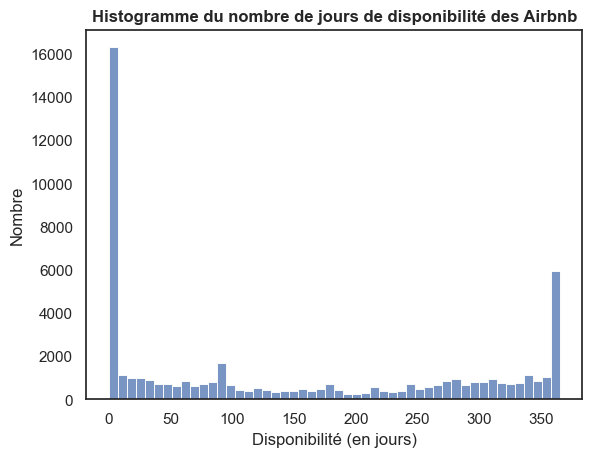

In [37]:
sns.histplot(data=df["Availability 365"],bins=int(50))
plt.title('Histogramme du nombre de jours de disponibilité des Airbnb', weight='bold')
plt.xlabel('Disponibilité (en jours)')
plt.ylabel('Nombre')

In [38]:
a = len(df[df['Availability 365']>300])
b = len(df[df['Availability 365']<60])
c = len(df[df['Availability 365']==0])
a,b,c

(12735, 22374, 14516)

On remarque que près de la moitié des Airbnb sont loués moins de 60 jours par an, ce qui semble correspondre au concept de base de Airbnb - c'est à dire louer sa maison ou son appartement quand on est en vacances ou autre pour arrondir ses fins de mois. 
Cependant, on voit aussi que plus de 12 000 Airbnb sont loués plus de 300 jours par an. On observe donc que certaines personnes louent quasiment en continuité leur logement sur Airbnb pour de courtes périodes, alors qu'ils pourraient le louer sur des longues durées. On peut donc supposer qu'il est plus intéressant financièrement de louer son bien sur Airbnb que en agence par exemple.

### 1.3 Influence de la taille du logement

On a vu dans la matrice de corrélation que la "taille" du logement était fortement corrélée au prix ce qui semble logique. On peut faire quelques statistiques descriptives pour avoir un aperçu des différentes tailles de logement. 

In [39]:
#On enlève les valeurs manquantes au niveau du nombre de salles de bain
df = df[df['Bathrooms'].notnull()]

Dans la partie modélisation, nous continuerons à enlever les lignes où il n'y a pas de données à propos du nombre de chambres, de lits, des frais de nettoyage, du dépôt de sécurité... Nous ne le faisons pas maintenant car cela ne laisse qu'environ 19000 lignes, et enlève des données essentielles pour l'analyse des reviews menée en partie 1.4.

In [40]:
#Nouveau data frame uniquement avec les airbnb où le nb de metres carrés est renseigné
df_feet = df.loc[(df['Square Feet'] !=0)]
len(df_feet)

52977

Text(0, 0.5, 'Quantité')

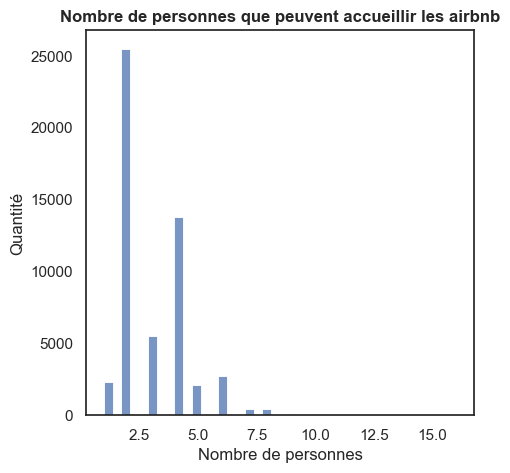

In [41]:
#Répartition du nombres de personnes que peuvent accueillir les Airbnb, pour savoir à quels types de logement on traite
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(df_feet['Accommodates'], bins=int(40))
plt.title ('Nombre de personnes que peuvent accueillir les airbnb', weight='bold')
plt.xlabel('Nombre de personnes')
plt.ylabel('Quantité')


La majorité des Airbnb accueillent 2 ou 4 personnes.

In [42]:
df_feet['Square Feet'].describe()

count     1482.000000
mean       544.098516
std        654.072407
min         11.000000
25%        291.000000
50%        431.000000
75%        646.000000
max      15059.000000
Name: Square Feet, dtype: float64


- il manque énormément de données sur les superficies : sur plus de 50 000 données à la base, on en a à peine 1500
- Le maximum de surface est de 15000 square feet ce qui correspond à 1393m2, probablement un erreur de saisie donc on va enlever tous les logements ayant une superficie supérieure à 2500 square feet (soit 232m2).

In [43]:
df_feet = df_feet.loc[(df_feet['Square Feet'] < 2500)]

Text(0, 0.5, 'Surface (en m2)')

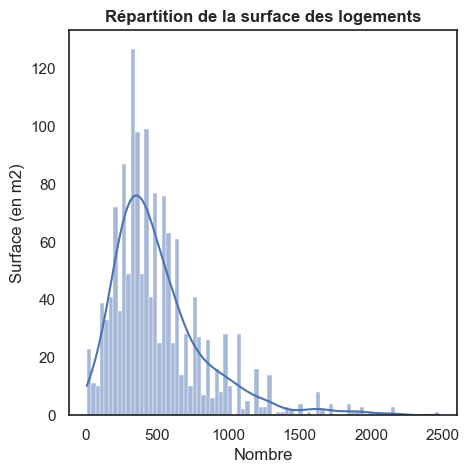

In [44]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data=df_feet['Square Feet'], kde=True, bins=int(80))
plt.title ('Répartition de la surface des logements', weight='bold')
plt.xlabel('Nombre')
plt.ylabel('Surface (en m2)')

A cause du nombre très important de données manquantes sur les surfaces des logements, on va désormais s'intéresser au nombre de chambres, de salles de bains, etc... qui sont également des bons indicateurs de la taille du logement.


In [45]:
df['Bathrooms'] = df['Bathrooms'].astype(int)

In [46]:
df['Bathrooms'].unique()

array([1, 0, 3, 2, 4, 6, 7, 5, 8])

In [47]:
df['Bedrooms'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan,  7.,  6., 10.,  8.])

In [48]:
df_bed = df.groupby('Bedrooms').agg({'Bedrooms':'count'})
df_bed.columns = ['count']
df_bed.reset_index(inplace=True)
df_bed.sort_values('count', ascending=False, ignore_index=True, inplace=True)
df_bed

Bedrooms  count
0       1.0  31801
1       0.0  11079
2       2.0   7849
3       3.0   2094
4       4.0    484
5       5.0     91
6       6.0     21
7       7.0      4
8      10.0      2
9       8.0      1

In [49]:
df_bath = df.groupby('Bathrooms').agg({'Bathrooms':'count'})
df_bath.columns = ['count']
df_bath.reset_index(inplace=True)
df_bath.sort_values('count', ascending=False, ignore_index=True, inplace=True)
df_bath

Bathrooms  count
0          1  49651
1          2   2914
2          0    538
3          3    308
4          4     59
5          6     30
6          5     22
7          7     13
8          8     12

Plus de 11 000 logements n'ont pas de chambre, on peut donc en déduire que ce sont des studios. La plus grande majorité des logements ont une unique salle de bain. 

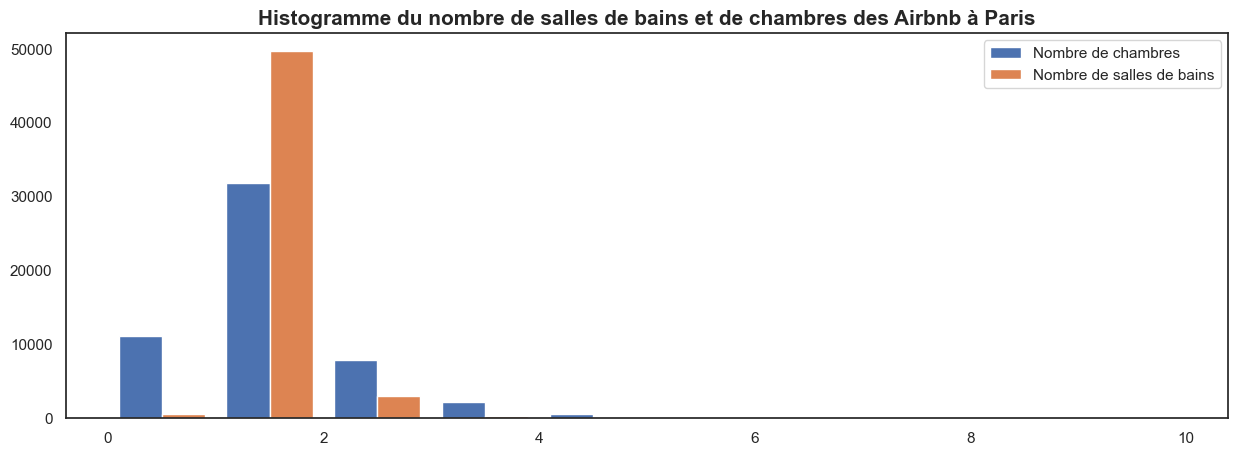

In [50]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.hist([df["Bedrooms"], df["Bathrooms"]], label=['Nombre de chambres', 'Nombre de salles de bains'], edgecolor = 'white')
plt.title("Histogramme du nombre de salles de bains et de chambres des Airbnb à Paris",size=15, weight='bold')
plt.legend()


### 1.4 Les reviews

On s'intéresse désormais aux revues des annonces, qui sont à priori essentielles lors de la réservation d'un bien.

In [51]:
df_review = df[['Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Reviews per Month', 'Price']]

Text(0.5, 1.0, "Prix en fonction du nombre de reviews sur l'appartement")

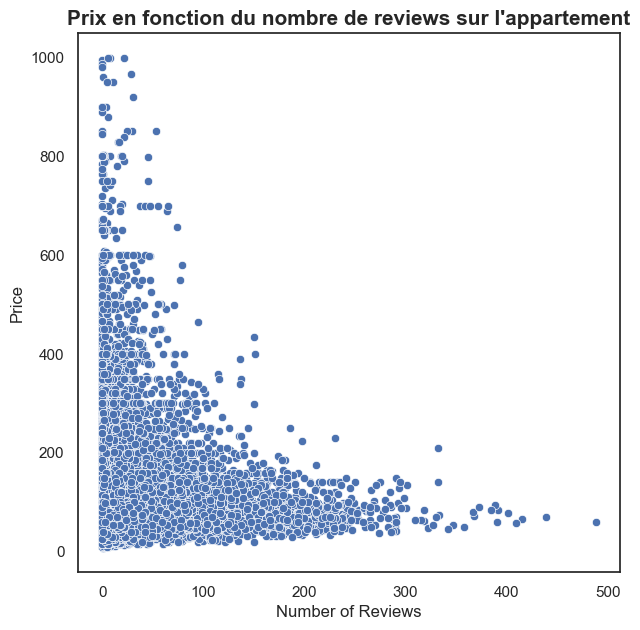

In [52]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="Number of Reviews", y="Price", data=df_review)

plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.title("Prix en fonction du nombre de reviews sur l'appartement",size=15, weight='bold')

On remarque clairement une corrélation négative entre le nombre de reviews et le prix. Les appartements les moins chers ont beaucoup plus de reviews. Plus précisement, pour des appartements ayant un prix inférieur à 200€, un nombre conséquent d'appartements ont plus de 200 reviews tandis que pour des appartements ayant un prix supérieur a 300€, aucun appartement n'a plus de 200 reviews.
 Cela peut s'expliquer par une demande moins importante pour les appartements plus chers, qui au final ont donc moins de reviews. Également, un loueur peut se permettre de mettre en vente son appartement moins souvent si le prix est très élevé (et donc moins de réservations, moins de reviews).

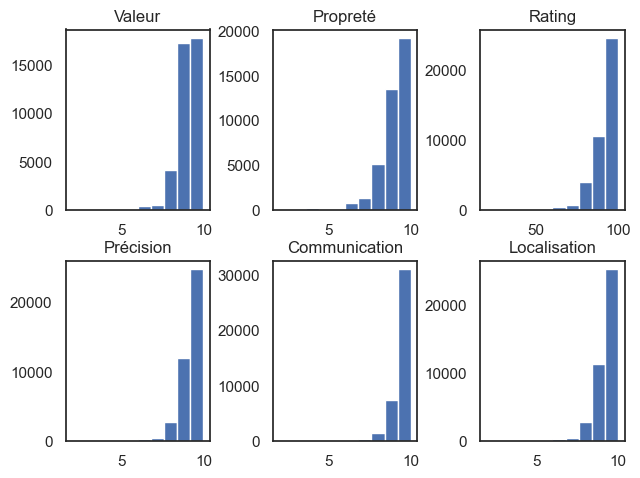

In [53]:

# On regarde la distribution sur les différentes notes données 

fig, ax = plt.subplots(2, 3)
fig.tight_layout()

ax[0, 0].hist(data["Review Scores Value"]) #row=0, col=0
ax[0, 0].set_title('Valeur')
ax[1, 0].hist(data["Review Scores Accuracy"]) #row=1, col=0
ax[1, 0].set_title('Précision')
ax[0, 1].hist(data["Review Scores Cleanliness"]) #row=0, col=1
ax[0, 1].set_title('Propreté')
ax[1, 1].hist(data["Review Scores Communication"]) #row=1, col=1
ax[1, 1].set_title('Communication')
ax[1, 2].hist(data["Review Scores Location"]) #row=1, col=2
ax[1, 2].set_title('Localisation')
ax[0, 2].hist(data["Review Scores Rating"]) #row=2, col=2
ax[0, 2].set_title('Rating')
plt.show()

Ensuite, pour déterminer les signaux de qualité transmis par les annonces, nous allons analyser ces dernières en regardant les mots les plus fréquemment utilisés pour décrire le bien mis à disposition sur la plateforme.

In [54]:
#On regarde le nombre d'offres qui n'ont pas de description 
data['Description'].isnull().sum()

7

In [55]:
# Si on ne veut pas fausser l'analyse textuelle et avoir un message d'erreur, il faut enlever les lignes qui correspondent à des valeur manquantes 
def transform(lst) :
  return ([i for item in lst for i in item.lower().split()])
full_reviews = transform(data['Description'].fillna(""))

On peut maintenant s'intéresser à la fréquence des mots sur les descriptions d'appartements, dans le but de regarder le lien potentiel avec les prix des Airbnb


In [56]:

# Fréquence de mots

nb_mots = collections.Counter(full_reviews) 

frq_mots = pd.DataFrame(nb_mots.most_common(8),
                             columns=['mots', 'occurences'])

frq_mots.head()


mots  occurences
0  the      234341
1  and      167659
2    a      159574
3   de      139466
4   et       92759

On obtient un résultat peu étonnant : les mots qui reviennent le plus sont des mots de liaison, des déterminants ou des conjonctions de coordination (« et »). 
Cependant, ces mots ne vont pas nous être utiles pour faire de l'analyse textuelle sur la qualité des descriptions. 
On va donc essayer d'enlever ces « stopwords », via la méthode vue en cours. 

In [57]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words(['french','english']))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ac3e2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ac3e2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [58]:
# On ajoute des stop words à la liste initiale, qui était mal configurée 

new_stopwords = ['1', 'one', '2', 'two', 'deux', '3','4','5', '10', '-', ':', ',', 'tout', '!', '.', "d'un", 'rue', 'pied', 'min', 'also', 'Paris', 'paris', 'paris.','paris,', 'parisian', 'place', 'flat', 'floor', 'room', 'bed', 'lit', 'chambre', 'situé', 'logement', 'salle', 'appartement', "l'appartement", 'apartment', 'minutes', 'métro', 'metro', 'studio','kitchen']
new_stopwords_list = stop_words.union(new_stopwords)

print(new_stopwords_list)


{'up', 'over', 'paris', 'i', 'me', 'fusse', 'mes', 'se', 'es', 'soient', 'par', 'both', 'yourselves', "hadn't", "it's", 'serons', 'isn', 'paris,', 'tu', 'with', "she's", 'on', 'serez', 'haven', 'him', 'there', 'have', 'wasn', 'serais', 'vous', 'those', 'which', 'did', 'de', "don't", 'other', 'ses', 'aurons', 'won', 'aura', 'furent', 'rue', 'that', 'wouldn', 'do', 'if', 'aie', 'own', 'has', 'don', 'apartment', 'room', 'very', 'notre', 'Paris', 'eu', 'can', 'off', 'étaient', 'an', 'above', 'êtes', 'sommes', 'll', 'only', 'hadn', 're', 'he', 'mustn', 'and', 'avais', 'nous', 'one', '1', 'qui', "hasn't", 'est', 'eus', 'hasn', 'deux', 'here', 'avons', 'were', 'eusses', 'nos', 'soyez', 'it', "you'll", 'appartement', 'fus', 'we', 'avaient', 'pour', 'now', 'until', 'such', 'whom', 'two', "doesn't", 'myself', 'suis', ',', 'you', 'aurais', 'before', 'these', 'aviez', 'étées', 'ayants', 'son', 'des', '2', 'en', "wouldn't", 'étantes', 'ta', 'eut', 'his', 'once', 'out', 'ou', 'minutes', 'fut', 'sera

In [59]:
mots_listing = [word for word in full_reviews if word not in new_stopwords_list]
nb_mots_listing = collections.Counter(mots_listing)
nb_mots_listing_df = pd.DataFrame(nb_mots_listing.most_common(33),
                             columns=['words', 'count'])

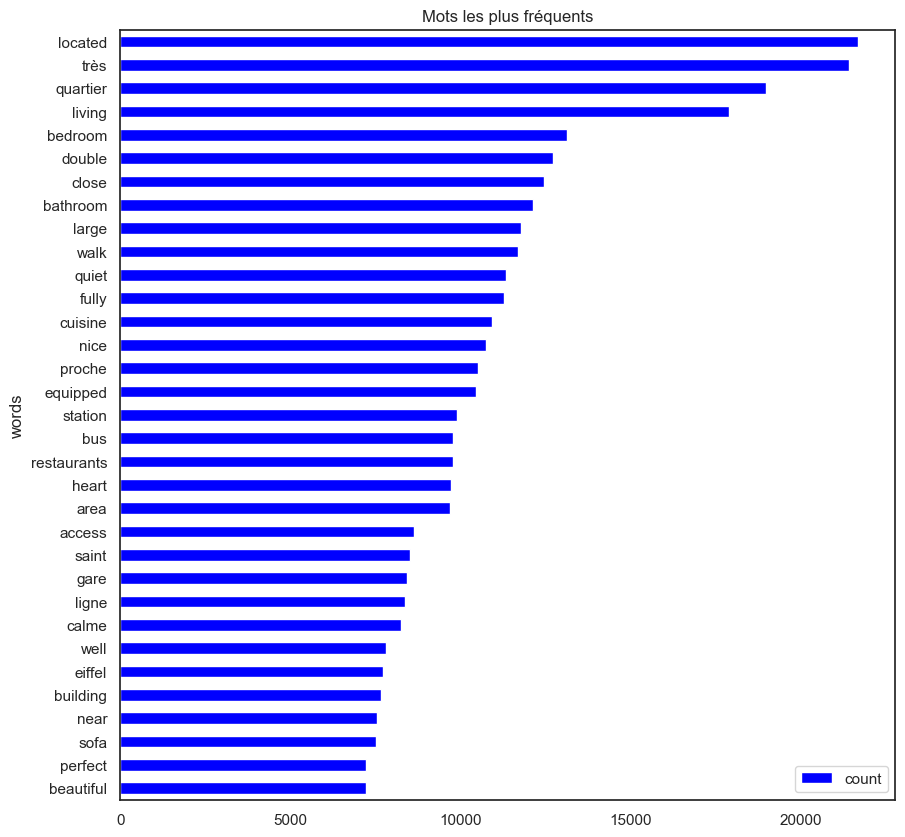

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))

nb_mots_listing_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Mots les plus fréquents")

plt.show()


On ajoute aussi un wordcloud pour mieux visualiser les mots importants dans les reviews. Il permet de souligner l'importance d'équipements tels que le wifi, la télévision, les salles de bain, mais aussi la proximité avec les restaurants ou les bars.

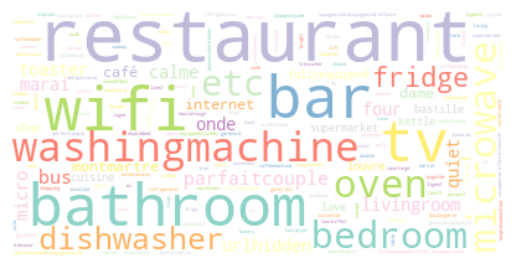

In [61]:
text = ''.join(mots_listing)

word_cloud = WordCloud(collocations = False, stopwords = new_stopwords_list, background_color = 'white', colormap = 'Set3').generate(text)

plt.imshow(word_cloud, interpolation='bilinear' )
plt.axis("off")
plt.show()

## 2. Modélisation

### 2.0 Nettoyage plus approfondi du dataset

Puisque les biens traités sont tous uniques, une valeur manquante concernant certaines variables (prix, du nombre de personnes accueillies, dépôt de sécurité...) ne peut pas être remplacée par une valeur moyenne ou médiane ("imputing"). On décide de supprimer les lignes si l'une des variables suivantes est manquante.

In [62]:
df.isnull().sum()

Name                                  3
Space                             16185
Description                           7
Neighborhood Overview             21289
Notes                             36296
Transit                           19009
Access                            26061
Host ID                               0
Host Since                           11
Host Response Time                17743
Host Response Rate                17743
Host Total Listings Count            11
Street                                0
Neighbourhood                      6827
Neighbourhood Cleansed                0
City                                  0
Zipcode                               0
Latitude                              0
Longitude                             0
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                             0
Bedrooms                            121
Beds                                 22


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53547 entries, 0 to 54512
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            53544 non-null  object 
 1   Space                           37362 non-null  object 
 2   Description                     53540 non-null  object 
 3   Neighborhood Overview           32258 non-null  object 
 4   Notes                           17251 non-null  object 
 5   Transit                         34538 non-null  object 
 6   Access                          27486 non-null  object 
 7   Host ID                         53547 non-null  int64  
 8   Host Since                      53536 non-null  object 
 9   Host Response Time              35804 non-null  object 
 10  Host Response Rate              35804 non-null  float64
 11  Host Total Listings Count       53536 non-null  float64
 12  Street                          

In [64]:
df = df[df['Cleaning Fee'].notnull()]
df = df[df['Security Deposit'].notnull()]

df = df[df['Bedrooms'].notnull()]
df = df[df['Amenities'].notnull()]
df = df[df['Review Scores Rating'].notnull()]
df = df[df['Host Since'].notnull()]
df = df[df['Host Response Time'].notnull()]

In [65]:
df.isnull().sum()

Name                                  0
Space                              2404
Description                           2
Neighborhood Overview              4306
Notes                              8755
Transit                            3713
Access                             5839
Host ID                               0
Host Since                            0
Host Response Time                    0
Host Response Rate                    0
Host Total Listings Count             0
Street                                0
Neighbourhood                      1805
Neighbourhood Cleansed                0
City                                  0
Zipcode                               0
Latitude                              0
Longitude                             0
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                             0
Bedrooms                              0
Beds                                  2


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15508 entries, 0 to 54508
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            15508 non-null  object 
 1   Space                           13104 non-null  object 
 2   Description                     15506 non-null  object 
 3   Neighborhood Overview           11202 non-null  object 
 4   Notes                           6753 non-null   object 
 5   Transit                         11795 non-null  object 
 6   Access                          9669 non-null   object 
 7   Host ID                         15508 non-null  int64  
 8   Host Since                      15508 non-null  object 
 9   Host Response Time              15508 non-null  object 
 10  Host Response Rate              15508 non-null  float64
 11  Host Total Listings Count       15508 non-null  float64
 12  Street                          

Maintenant qu'il n'y a plus de valeurs manquantes pour des colonnes essentielles à notre modèle, nous allons transformer des variables qualitatives en variables quantitatives. Par exemple, la variable "Cancellation Policy" peut jouer un rôle très important dans la réservation d'un Airbnb - on aura plutôt tendance à favoriser un Airbnb avec des conditions d'annulation flexibles en cas d'imprévu.

Après lecture des indications liées aux différents modes d'annulation et de remboursement, on décide d'attribuer un score entre 1 et 5 aux annonces ; 5 correspond à "super_strict60", qui laisse très peu de flexibilité aux clients, et 1 à "flexible", qui permet d'annuler jusqu'à 24h à l'avance sans frais.

Il n'y a aucune annonce correspondant à "super_strict_60", donc tous nos listings auront un score entre 1 et 4. On crée la nouvelle variable, puis on la fait correspondre aux politiques d'annulation.

In [67]:
df["Score Annulation"] = 0

In [68]:
df["Cancellation Policy"].unique()

array(['strict', 'moderate', 'flexible', 'super_strict_30'], dtype=object)

In [69]:
df.loc[df['Cancellation Policy']=='flexible', "Score Annulation"] = 1 
df.loc[df['Cancellation Policy']=='moderate', "Score Annulation"] = 2
df.loc[df['Cancellation Policy']=='strict', "Score Annulation"] = 3
df.loc[df['Cancellation Policy']=='super_strict_30', "Score Annulation"] = 4 

In [70]:
df

Name  \
0                          STUDIO PIGALLE W BALCONY   
8                         Montmartre-Metro Abbesses   
16             ♥ Exotic Loft Montmartre + terrace !   
19               Cosy flat / Montmartre 10 min walk   
33                        flat to rent these summer   
...                                             ...   
54500             Cosy studio w/bath - Eiffel Tower   
54504  Apt 60 m² balcony Champ de Mars Eiffel Tower   
54506                           Chic district, B&B.   
54507                Blvd St Germain - Orsay Museum   
54508           Rue Cler at 500m from Eiffel Tower!   

                                                   Space  \
0      This newly refurbished flat is ideal for a cou...   
8      Quartier bobo (bourgeois-bohème) où se rencont...   
16     Welcome to you! - Loft 80m² near Montmartre  -...   
19     The Sacré Coeur and the Abbesses street is 10 ...   
33     My flat is located in Le marais nearby Place d...   
...                                                  ...   
54500  This small apartment has been completely renov...   
54504                                                NaN   
54506  Nestled in a residential, safe and central are...   
54507  We are a family of antique dealers and interio...   
54508  Ce logement se trouve au 2e étage et comporte ...   

                                             Description  \
0      In the heart of Montmarte Pigalle, this lovely...   
8      Petit logement pour 2 personnes (15m²-161 sq f...   
16     Exotic loft with a terrace of 35 m² at the foo...   
19     The apartment is ideally located in Paris, at ...   
33     I rent my flat these summer (july and august) ...   
...                                                  ...   
54500  Charming & quiet place in the historical distr...   
54504  Charming apt - 60m² - near Champ de Mars - Eif...   
54506  This beautiful 160 sq meter apartment is locat...   
54507  Cosy and very quiet one bedroom apartment (sle...   
54508  Logement très calme, ensoleillé, situé derrièr...   

                                   Neighborhood Overview  \
0      It is central enough for you to walk your way ...   
8      L'appartement se situe à 180 mètres du métro A...   
16     Nearby you will find many shops for groceries,...   
19     The apartment is very well located for explori...   
33     Le Marais is a nice area, full of old building...   
...                                                  ...   
54500                                                NaN   
54504                                                NaN   
54506  Located on the left bank of the Seine, it's on...   
54507  The 7th district is one of the most exclusive ...   
54508  Quartier "vivant" aussi bien de jour comme de ...   

                                                   Notes  \
0      Real globetrotters, we are real Parisians with...   
8      -----Internet free WIFI------ -----Bed linen a...   
16     My wife Michelle and I Damien, pay attention t...   
19     Suivant la saison et la durée de votre séjour,...   
33                                   - pas d'animaux svp   
...                                                  ...   
54500                                                NaN   
54504  Domestic equipment : nespresso, fridge, toaste...   
54506  You can check-in between 14:00 pm and 22:00 pm...   
54507  Our apartment has a king size bed but can be s...   
54508                                                NaN   

                                                 Transit  \
0      The flat is ideally located in Montmartre Piga...   
8                                                    NaN   
16     There are many bus lines and subway to anywher...   
19     Located near the Simplon metro station (line 4...   
33     all transports facilities nearby To get here f...   
...                                                  ...   
54500  Metro Line 8 Metro Line 13 Rer station Invalid...   
54504  Access : metros

De même, on crée une variable numérique Réactivité qui correspond à la qualité de "Host Response Time" ; plus l'hôte répond rapidement, plus le score est bas.

In [71]:
df["Reactivite"] = 0

In [72]:
df["Host Response Time"].unique()

array(['within an hour', 'within a day', 'within a few hours',
       'a few days or more'], dtype=object)

In [73]:
df.loc[df['Host Response Time']=='within an hour', "Reactivite"] = 1 
df.loc[df['Host Response Time']=='within a few hours', "Reactivite"] = 2
df.loc[df['Host Response Time']=='within a day', "Reactivite"] = 3
df.loc[df['Host Response Time']=='a few days or more', "Reactivite"] = 4 

Enfin, on crée une variable "Popu Arrondissement" qui correspond au nombre d'annonces par arrondissement ; en effet, cette variable peut influencer le prix d'une annonce et aussi favoriser une réservation par rapport à une autre annonce.

In [74]:
df["Popu Arrondissement"]=0

In [75]:
df['Arrondissement'].unique()

array([18,  4, 17, 19, 15,  7,  9, 10, 12, 11,  8, 13,  6,  5,  1,  3, 20,
        2, 14, 16], dtype=int64)

In [76]:
listepopu = df.groupby(['Arrondissement']).agg({'Arrondissement':'count'})
listepopu


Arrondissement
Arrondissement                
1                          487
2                          692
3                          887
4                          808
5                          685
6                          736
7                          583
8                          465
9                          656
10                        1110
11                        1494
12                         485
13                         400
14                         522
15                        1066
16                         739
17                         885
18                        1577
19                         580
20                         651

In [77]:
df['Popu Arrondissement'] = df['Arrondissement'].groupby(df['Arrondissement']).transform('count')

In [78]:
df['Popu Arrondissement'].unique()

array([1577,  808,  885,  580, 1066,  583,  656, 1110,  485, 1494,  465,
        400,  736,  685,  487,  887,  651,  692,  522,  739], dtype=int64)

In [79]:
df

Name  \
0                          STUDIO PIGALLE W BALCONY   
8                         Montmartre-Metro Abbesses   
16             ♥ Exotic Loft Montmartre + terrace !   
19               Cosy flat / Montmartre 10 min walk   
33                        flat to rent these summer   
...                                             ...   
54500             Cosy studio w/bath - Eiffel Tower   
54504  Apt 60 m² balcony Champ de Mars Eiffel Tower   
54506                           Chic district, B&B.   
54507                Blvd St Germain - Orsay Museum   
54508           Rue Cler at 500m from Eiffel Tower!   

                                                   Space  \
0      This newly refurbished flat is ideal for a cou...   
8      Quartier bobo (bourgeois-bohème) où se rencont...   
16     Welcome to you! - Loft 80m² near Montmartre  -...   
19     The Sacré Coeur and the Abbesses street is 10 ...   
33     My flat is located in Le marais nearby Place d...   
...                                                  ...   
54500  This small apartment has been completely renov...   
54504                                                NaN   
54506  Nestled in a residential, safe and central are...   
54507  We are a family of antique dealers and interio...   
54508  Ce logement se trouve au 2e étage et comporte ...   

                                             Description  \
0      In the heart of Montmarte Pigalle, this lovely...   
8      Petit logement pour 2 personnes (15m²-161 sq f...   
16     Exotic loft with a terrace of 35 m² at the foo...   
19     The apartment is ideally located in Paris, at ...   
33     I rent my flat these summer (july and august) ...   
...                                                  ...   
54500  Charming & quiet place in the historical distr...   
54504  Charming apt - 60m² - near Champ de Mars - Eif...   
54506  This beautiful 160 sq meter apartment is locat...   
54507  Cosy and very quiet one bedroom apartment (sle...   
54508  Logement très calme, ensoleillé, situé derrièr...   

                                   Neighborhood Overview  \
0      It is central enough for you to walk your way ...   
8      L'appartement se situe à 180 mètres du métro A...   
16     Nearby you will find many shops for groceries,...   
19     The apartment is very well located for explori...   
33     Le Marais is a nice area, full of old building...   
...                                                  ...   
54500                                                NaN   
54504                                                NaN   
54506  Located on the left bank of the Seine, it's on...   
54507  The 7th district is one of the most exclusive ...   
54508  Quartier "vivant" aussi bien de jour comme de ...   

                                                   Notes  \
0      Real globetrotters, we are real Parisians with...   
8      -----Internet free WIFI------ -----Bed linen a...   
16     My wife Michelle and I Damien, pay attention t...   
19     Suivant la saison et la durée de votre séjour,...   
33                                   - pas d'animaux svp   
...                                                  ...   
54500                                                NaN   
54504  Domestic equipment : nespresso, fridge, toaste...   
54506  You can check-in between 14:00 pm and 22:00 pm...   
54507  Our apartment has a king size bed but can be s...   
54508                                                NaN   

                                                 Transit  \
0      The flat is ideally located in Montmartre Piga...   
8                                                    NaN   
16     There are many bus lines and subway to anywher...   
19     Located near the Simplon metro station (line 4...   
33     all transports facilities nearby To get here f...   
...                                                  ...   
54500  Metro Line 8 Metro Line 13 Rer station Invalid...   
54504  Access : metros

## 2.1 Préparation du modèle

Le dataset étant de taille assez conséquente, nous allons le "shuffler" puis le diviser en 5, afin d'avoir 5 samples iid.

In [80]:
df_shuffle = df.sample(frac = 1)
df_shuffle

Name  \
24818           17-LUXURY PARISIEN FLAT MONTORGUEIL 2   
13721              Private room in vivid neighborhood   
33634                   Nice 45m2 apartment in Buttes   
34925               BEAUTIFUL STUDIO CLOSE NOTRE DAME   
19122              Cosy 2bedroom near Daumesnil Bercy   
...                                               ...   
5659                2 Pièces Porte Versailles Parking   
52003            Petit Villey, Pleasant life in Paris   
13764  Bel Appt. 65 m², sur Seine, calme et lumineux.   
9676             Wonderful Apartment close to Opera !   
44401               Elegant Studio Balcony Notre Dame   

                                                   Space  \
24818                                                NaN   
13721  A room with double airbed, very comfortable.  ...   
33634  In a Haussmann style building dating from 1885...   
34925  A charming Studio of 12 M in the Latin Quartie...   
19122  With our renovations just finished, this 2 bed...   
...                                                  ...   
5659   Dans residence hoteliere de standing, coquet e...   
52003  The decoration is simple and comfy. The kitche...   
13764  La résidence est entourée d'espaces verts priv...   
9676   Luxurious apartment of 150m² in the 2nd arrond...   
44401  This beautiful studio is ideally located on Bo...   

                                             Description  \
24818  Luxueux appartement parisien composé de 3 cham...   
13721  Room for 2 or apartment for 4, very comfortabl...   
33634  Nice 45m2 apartment in Buttes,  completely ren...   
34925  A charming Studio of 20 M in the Latin Quartie...   
19122  Cosy two bedroom apartment in charming family-...   
...                                                  ...   
5659   Dans residence hoteliere de standing, coquet e...   
52003  This renovated apartment bright and pleasant t...   
13764  L'appartement a vue sur la Seine et la verdure...   
9676   An outstanding luxury apartment located in the...   
44401  Beautiful studio of 35m² with balcony along le...   

                                   Neighborhood Overview  \
24818                                                NaN   
13721  Nice neighborhood on the heights of east Paris...   
33634  Very nice area between the canal and Ourq Butt...   
34925                                                NaN   
19122  The apartment is located in the 12éme arrondis...   
...                                                  ...   
5659   A deux pas du Parc des Expositions  Aquaboulev...   
52003  For the renting one month or more than one mon...   
13764  Le quartier est calme, familial et commerçant....   
9676   Opéra Garnier, Musée, Grevin, Bourse de Paris,...   
44401  The location is perfect to visit Paris, since ...   

                                                   Notes  \
24818                                                NaN   
13721  I am travelling quiet often, so if you want to...   
33634                                                NaN   
34925  There will be extra charges if you would like ...   
19122  Our apartment is available weekends and occasi...   
...                                                  ...   
5659                                                 NaN   
52003  For the renting one month or more than one mon...   
13764                                                NaN   
9676   Standard check-in time is between 4:00PM and 8...   
44401                                                NaN   

                                                 Transit  \
24818                                                NaN   
13721  Subway M2, Ménilmontant or Père Lachaise, M3 G...   
33634  Métro Laumieres, only 3 stop (8 minutes) from ...   
34925        BUS 91 AND 57 UNDERGROUND TRAIN 5 AND RER C   
19122  10 minutes walk to line 6 (dugommier), line 8 ...   
...                                                  ...   
5659   Tram "porte d Issy" au pied de l immeuble Métr...   


In [81]:
df_splits = np.array_split(df_shuffle, 5)
df_splits

[                                                  Name  \
 24818            17-LUXURY PARISIEN FLAT MONTORGUEIL 2   
 13721               Private room in vivid neighborhood   
 33634                    Nice 45m2 apartment in Buttes   
 34925                BEAUTIFUL STUDIO CLOSE NOTRE DAME   
 19122               Cosy 2bedroom near Daumesnil Bercy   
 ...                                                ...   
 24558                     Apartment 5th arrondissement   
 11911   Apartment Gustave, Le Marais, Spa 4**** access   
 30467                   Cosy Studio au coeur du 15ième   
 27717                 Cosy Place in The Heart of Paris   
 52755  Magnifique appartement parisien plein de charme   
 
                                                    Space  \
 24818                                                NaN   
 13721  A room with double airbed, very comfortable.  ...   
 33634  In a Haussmann style building dating from 1885...   
 34925  A charming Studio of 12 M in the Latin

In [82]:
df1 = df_splits[0]

On travaillera donc sur 5 subsets.

### 2.2 Traitement du 1er subset

Nous traiterons uniquement ici le 1er subset pour des questions de simplification ; de plus, les 5 subsets étant iid, en traiter un revient à priori à traiter n'importe lequel.
En reprenant les graphes de la partie 1, on remarque que la majorité des Airbnb accueillent 8 personnes ou moins, et que la majorité des prix sont en dessous de 400 euros par nuit. Pour éviter les outliers, on sélectionne les parties du dataframe qui respectent ces conditions.

In [83]:
model1 = df1[(df1['Price'] < 400) & (df1['Accommodates'] <= 8)]
list(model1.columns)

['Name',
 'Space',
 'Description',
 'Neighborhood Overview',
 'Notes',
 'Transit',
 'Access',
 'Host ID',
 'Host Since',
 'Host Response Time',
 'Host Response Rate',
 'Host Total Listings Count',
 'Street',
 'Neighbourhood',
 'Neighbourhood Cleansed',
 'City',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Amenities',
 'Square Feet',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Calendar Updated',
 'Has Availability',
 'Availability 30',
 'Availability 60',
 'Availability 90',
 'Availability 365',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Cancellation Policy',
 'Calculated host listings count',
 'Reviews per Month',
 'Geolocation',
 'Arrondissemen

In [84]:
df1['Price'].mean()

101.48033526756932

Le prix moyen par nuit du subset est de 100 euros par nuit.

On sélectionne les colonnes que l'on gardera pour les régressions ; les colonnes suivantes sont celles que l'on supprime du modèle.

In [85]:
drop_cols = ['Name','Space','Description','Neighborhood Overview',
 'Notes',
 'Transit',
 'Access',
 'Host ID',
 'Host Since',
 'Host Response Rate',
 'Host Total Listings Count',
 'Street',
 'Neighbourhood',
 'Host Response Time',
 'Neighbourhood Cleansed',
 'City',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Amenities',
 'Square Feet',
 'Security Deposit',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Calendar Updated',
 'Has Availability',
 'Availability 60',
 'Availability 90',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Cancellation Policy',
 'Reviews per Month',
 'Geolocation'
]

On prépare donc nos vecteurs X et y, avec les variables explicatives et la variable expliquée - ici, le prix 'Price'.

In [86]:
X = model1.copy()
X = X.drop(drop_cols,axis=1)
y = X['Price']


In [87]:
X.columns, y

(Index(['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
        'Cleaning Fee', 'Availability 30', 'Availability 365',
        'Calculated host listings count', 'Arrondissement', 'Score Annulation',
        'Reactivite', 'Popu Arrondissement'],
       dtype='object'),
 13721     60.0
 33634     75.0
 34925     44.0
 19122     90.0
 6229      75.0
          ...  
 24558    115.0
 11911    278.0
 30467     55.0
 27717     94.0
 52755    205.0
 Name: Price, Length: 3059, dtype: float64)

On simplifie le nom des variables en mettant en minuscule les premières lettres de celles-ci.

On supprime évidemment le prix des variables explicatives.

In [88]:
X = X.drop('Price', axis = 1)
X.columns

Index(['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Cleaning Fee',
       'Availability 30', 'Availability 365', 'Calculated host listings count',
       'Arrondissement', 'Score Annulation', 'Reactivite',
       'Popu Arrondissement'],
      dtype='object')

In [89]:
cols = [x.lower() for x in X.columns.tolist()]
X.columns = cols

In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3059 entries, 13721 to 52755
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   accommodates                    3059 non-null   int64  
 1   bathrooms                       3059 non-null   int32  
 2   bedrooms                        3059 non-null   float64
 3   beds                            3058 non-null   float64
 4   cleaning fee                    3059 non-null   float64
 5   availability 30                 3059 non-null   int64  
 6   availability 365                3059 non-null   int64  
 7   calculated host listings count  3059 non-null   int64  
 8   arrondissement                  3059 non-null   int64  
 9   score annulation                3059 non-null   int64  
 10  reactivite                      3059 non-null   int64  
 11  popu arrondissement             3059 non-null   int64  
dtypes: float64(3), int32(1), int6

In [91]:
df2 = X.copy()
y_copy = y.copy()

On subdivise le dataset en une partie test train (pour fiter le modèle), test (pour évaluer celui-ci) et un set de validation.

In [92]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [93]:
print(f' X_train shape : {X_train.shape}')
print(f' X_val shape : {X_val.shape}')
print(f' X_test shape : {X_test.shape}')

 X_train shape : (1835, 12)
 X_val shape : (612, 12)
 X_test shape : (612, 12)


### 2.3 Approche par OLS

In [94]:
X_train.head()

accommodates  bathrooms  bedrooms  beds  cleaning fee  availability 30  \
22010             3          1       1.0   2.0          39.0                1   
23982             4          1       2.0   2.0          15.0                3   
11590             4          1       0.0   1.0          10.0               29   
8544              3          1       2.0   2.0          30.0                4   
26898             8          1       3.0   4.0          20.0                5   

       availability 365  calculated host listings count  arrondissement  \
22010                50                               6               1   
23982                57                               1              13   
11590               364                               1              13   
8544                312                               1               5   
26898               254                               2              18   

       score annulation  reactivite  popu arrondissement  
22010                 3           1                  487  
23982                 1           1                  400  
11590                 2           3                  400  
8544                  2           1                  685  
26898                 1           3                 1577

On procède à la régression par OLS sur le set d'entraînement X_train.

In [95]:
std = StandardScaler() 
std.fit(X_train.values) 
X_train_scaled = std.transform(X_train.values)
X_val_scaled = std.transform(X_val.values)
train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
model = sm.OLS(np.array(y_train), sm.add_constant(train_df))

fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     228.3
Date:                Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:34:58   Log-Likelihood:                -9123.2
No. Observations:                1835   AIC:                         1.827e+04
Df Residuals:                    1822   BIC:                         1.834e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             98.1079      0.818    119.948      0.000      96.504      99.712
accommodates                      12.8890      1.493      8.635      0.000       9.962      15.816
bathrooms                         10.2235      0.923     11.078      0.000       8.414      12.033
bedrooms                          12.5440      1.177     10.659      0.000      10.236      14.852
beds                               1.2084      1.463      0.826      0.409      -1.661       4.078
cleaning fee                      14.2100      1.038     13.694      0.000      12.175      16.245
availability 30                    3.5994      0.940      3.829      0.000       1.756       5.443
availability 365                   2.4771      0.937      2.643      0.008       0.639       4.315
calculated host listings count     1.7018      0.877      1.941      0.052      -0.018       3.422
arrondissement                   -12.3974      0.906    -13.683      0.000     -14.174     -10.620
score annulation                   0.3443      0.867      0.397      0.691      -1.356       2.045
reactivite                        -1.5802      0.860     -1.837      0.066      -3.267       0.107
popu arrondissement               -1.7979      0.868     -2.070      0.039      -3.501      -0.095
==============================================================================
Omnibus:                      378.300   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1212.988
Skew:                           1.021   Prob(JB):                    4.01e-264
Kurtosis:                       6.419   Cond. No.                         4.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On remarque plusieurs choses : le R^2 est d'environ 0.6, i.e. les variables explicatives permettent assez bien de décrire le prix des Airbnb parisiens. La plupart des p-values sont faibles, donc on a une bonne significativité de celles-ci. La popularité de l'arrondissement et le nombre de lits sont les variables les moins significatives.
Le signe du coefficient lié à la "réactivité" est cohérent, car notre variable réactivité est indexée "à l'envers" (par choix), et mesure en réalité le manque de réactivité des hôtes. La capacité d'accueil, le nombre de chambres, l'arrondissement et les frais de ménage, par leurs "grands" coefficients, sont les variables les plus significatives en pratique.
On procède à la même régression, cette fois-ci appliquée au set de validation

### 2.4 Regression avec Scikit-Learn

On définit d'abord l'erreur absolue moyenne entre les valeurs réelles et les valeurs prédites. ELle permet de mesurer la précision du modèle. Plus elle est proche de 0, plus le modèle est précis. Elle est donnée sur la même échelle que les valeurs du modèle, donc il faudra la comparer par rapport aux prix pour se rendre compte de la précision.

In [96]:
def ema_score(pred, actual):
    return np.mean(np.abs(np.exp(actual) - np.exp(pred)))

In [97]:
lr = LinearRegression() 

lr.fit(X_train_scaled, y_train)

train_pred = lr.predict(X_train_scaled)
val_pred = lr.predict(X_val_scaled)

print(f'Linear Regression (train) R^2: {lr.score(X_train_scaled, y_train)}')
print(f'Linear Regression (validation) R^2: {lr.score(X_val_scaled, y_val)}')

print("\n EMA du Train:", round(mean_absolute_error(y_train, train_pred),4))
print("EMA de Validation:", round(mean_absolute_error(y_val, val_pred),4))

Linear Regression (train) R^2: 0.6005272265384736
Linear Regression (validation) R^2: 0.5327836668107073

 EMA du Train: 25.1006
EMA de Validation: 24.3155


Les R^2 sont relativement similaires à celui trouvé dans la partie précédente. De plus, l'erreur moyenne absolue est d'environ 25 ; comparée aux prix moyens (calculée plus haut), cette erreur est correcte, et le modèle est assez précis (même s'il pourrait l'être davantage).

In [98]:
y_train.describe()

count    1835.000000
mean       98.107902
std        55.253676
min        20.000000
25%        60.000000
50%        83.000000
75%       120.000000
max       399.000000
Name: Price, dtype: float64

On trace maintenant les prix réels comparés à ceux prédits, ainsi que la distribution des résidus.

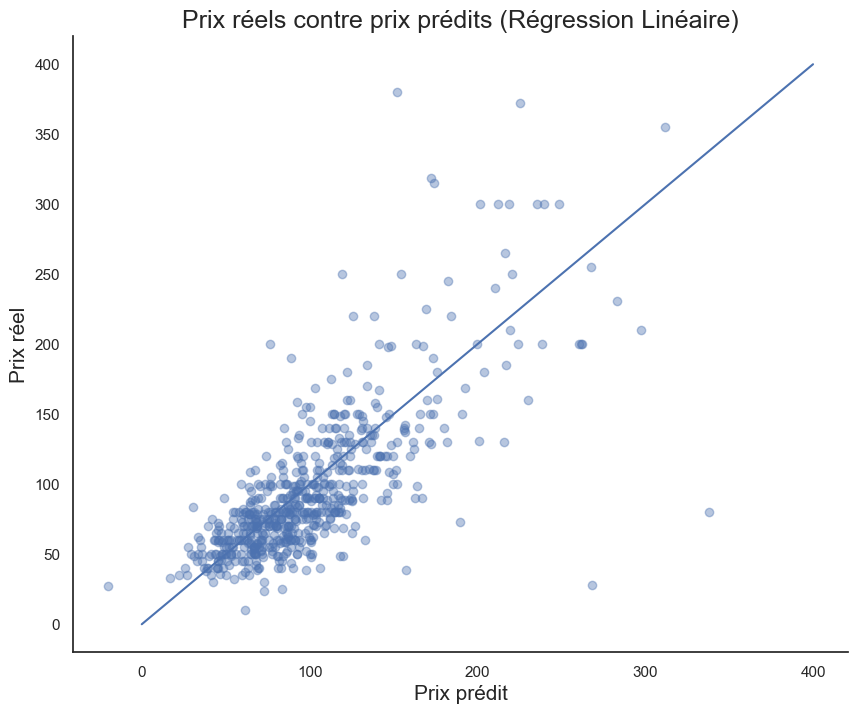

In [99]:
plt.figure(figsize=(10, 8))
plt.plot([0,400], [0,400], )
plt.scatter(val_pred, y_val, alpha=0.4)
sns.despine()
plt.ylabel('Prix réel', size=15)
plt.xlabel('Prix prédit', size=15)
plt.title('Prix réels contre prix prédits (Régression Linéaire)', size=18);
plt.savefig('actual_plot', bbox_inches ='tight', dpi = 400)

Les points sont assez proches du tracé de la fonction identité. C'est assez cohérent avec la valeur du R^2 calculée. On observe une dispersion pour les prix les plus élevés, qui sont souvent plus faibles dans leur valeur prédite que leur valeur réelle.

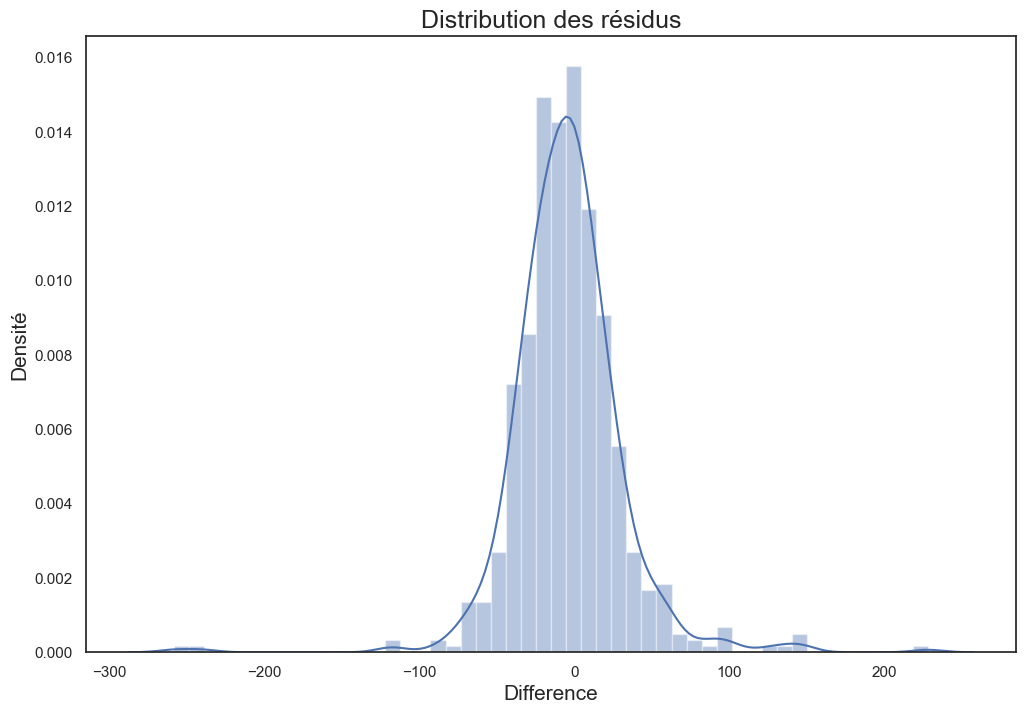

In [100]:
plt.figure(figsize=(12,8))
sns.distplot(y_val - val_pred) 
plt.title('Distribution des résidus', size = 18)
plt.xlabel('Difference', size = 15);
plt.ylabel('Densité', size = 15);
plt.savefig('residuals', bbox_inches ='tight', dpi = 400);

Les résidus semblent plutôt être distribués selon une loi normale centrée en 0. Cohérent avec l'hypothèse habituelle de normalité des termes d'erreur.

Pour éviter l'overfitting et améliorer notre modèle, on passe à une partie de regularisation, via les méthodes de Lasso et Ridge. Le but sera de minimiser le biais et la variance, sans en privilégier un en particulier.

### 2.5 Regularisation

####  2.5.1 Lasso

On ajoute un terme de pénalité en norme L1, ici noté alpha.

In [101]:
kf = KFold(n_splits=5, shuffle=True, random_state = 21)

alphavec = 10**np.linspace(-3,3,500)

lasso_model = LassoCV(alphas = alphavec, cv=kf)

lasso_model.fit(X_train_scaled, y_train)

print('LassoCV alpha:', lasso_model.alpha_)

print(f'LassoCV train R^2: {lasso_model.score(X_train_scaled, y_train):.3f}')
print(f'LassoCV validation R^2: {lasso_model.score(X_val_scaled, y_val):.3f}')

train_pred = lasso_model.predict(X_train_scaled)
y_val_pred = lasso_model.predict(X_val_scaled)

print('EMA pour le train en LassoCV:', round(mean_absolute_error(y_train, train_pred),4))
print('EMA pour la validation en LassoCV:', round(mean_absolute_error(y_val, y_val_pred),4))

LassoCV alpha: 0.0672442742348425
LassoCV train R^2: 0.601
LassoCV validation R^2: 0.534
EMA pour le train en LassoCV: 25.0877
EMA pour la validation en LassoCV: 24.288


Les R^2 restent semblables à ceux qu'on avait obtenus avant (on n'a pas ajouté ou enlevé de variable explicative, donc cohérent) ; l'erreur moyenne absolue reste semblable à celle trouvée juste avant. Le alpha est assez faible, mais non nul donc les coefficients ont une valeur incluse entre 0 et celle de la régression simple. Plus alpha augmente, plus les coefficients tendent vers 0 à cause de la pénalité.

De même, on trace les prix réels en comparaison avec ceux prédits.

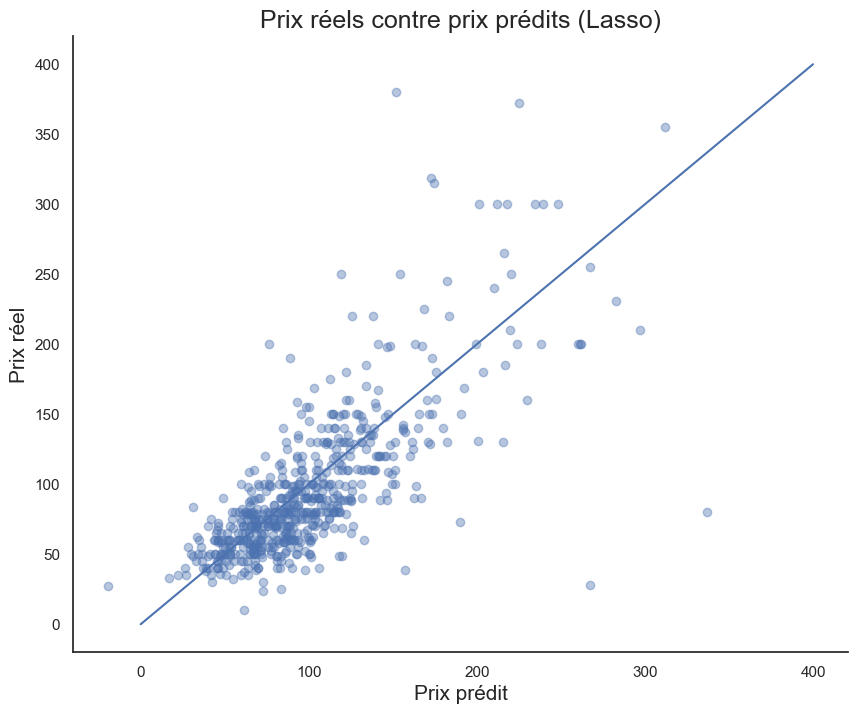

In [102]:
plt.figure(figsize=(10, 8))
plt.plot([0,400], [0,400])
plt.scatter(y_val_pred, y_val, alpha=0.4)
sns.despine()
plt.ylabel('Prix réel', size=15)
plt.xlabel('Prix prédit', size=15)
plt.title('Prix réels contre prix prédits (Lasso)', size=18);
plt.savefig('actual plot', bbox_inches ='tight', dpi = 400)

On remarque la même chose que précedemment : la plupart des prix sont assez proches de la droite identité, mais quand ils augmentent, ils tendent plus souvent à être plus grands dans leur valeur réelle que prédite. 

#### 2.5.2 Ridge

Le terme de pénalité passe maintenant sous norme 2.

In [103]:
alphavec = 10**np.linspace(-3,3,500)

ridge_model = RidgeCV(alphas = alphavec, cv=kf)

ridge_model.fit(X_train_scaled, y_train)

print('Ridge alpha:', ridge_model.alpha_)

print(f'RidgeCV train R^2: {ridge_model.score(X_train_scaled, y_train):.3f}')
print(f'RidgeCV validation R^2: {ridge_model.score(X_val_scaled, y_val):.3f}')

train_pred = ridge_model.predict(X_train_scaled)
y_val_pred = ridge_model.predict(X_val_scaled)

print('EMA du Train pour Ridge:', round(mean_absolute_error(y_train, train_pred),4))
print('EMA de Validation pour Ridge :', round(mean_absolute_error(y_val, y_val_pred),4))

Ridge alpha: 42.58518291843414
RidgeCV train R^2: 0.600
RidgeCV validation R^2: 0.536
EMA du Train pour Ridge: 25.0776
EMA de Validation pour Ridge : 24.2178


Les R^2 restent semblables à ceux qu'on avait obtenus ; l'erreur moyenne absolue reste également similaire à celle trouvée juste avant. Le alpha vaut entre 40 et 50, donc les coefficients ont une valeur incluse entre 0 et celle de la régression simple, plus proches de 0 qu'avec le Lasso.

### 2.6 Coefficients de la régression linéaire

Nous nous intéressons maintenant à la visualisation de l'importance de chaque feature, pour déterminer ce qui influence le plus les prix des Airbnb. Voici d'abord les coefficients numériques, puis leur représentation graphique.

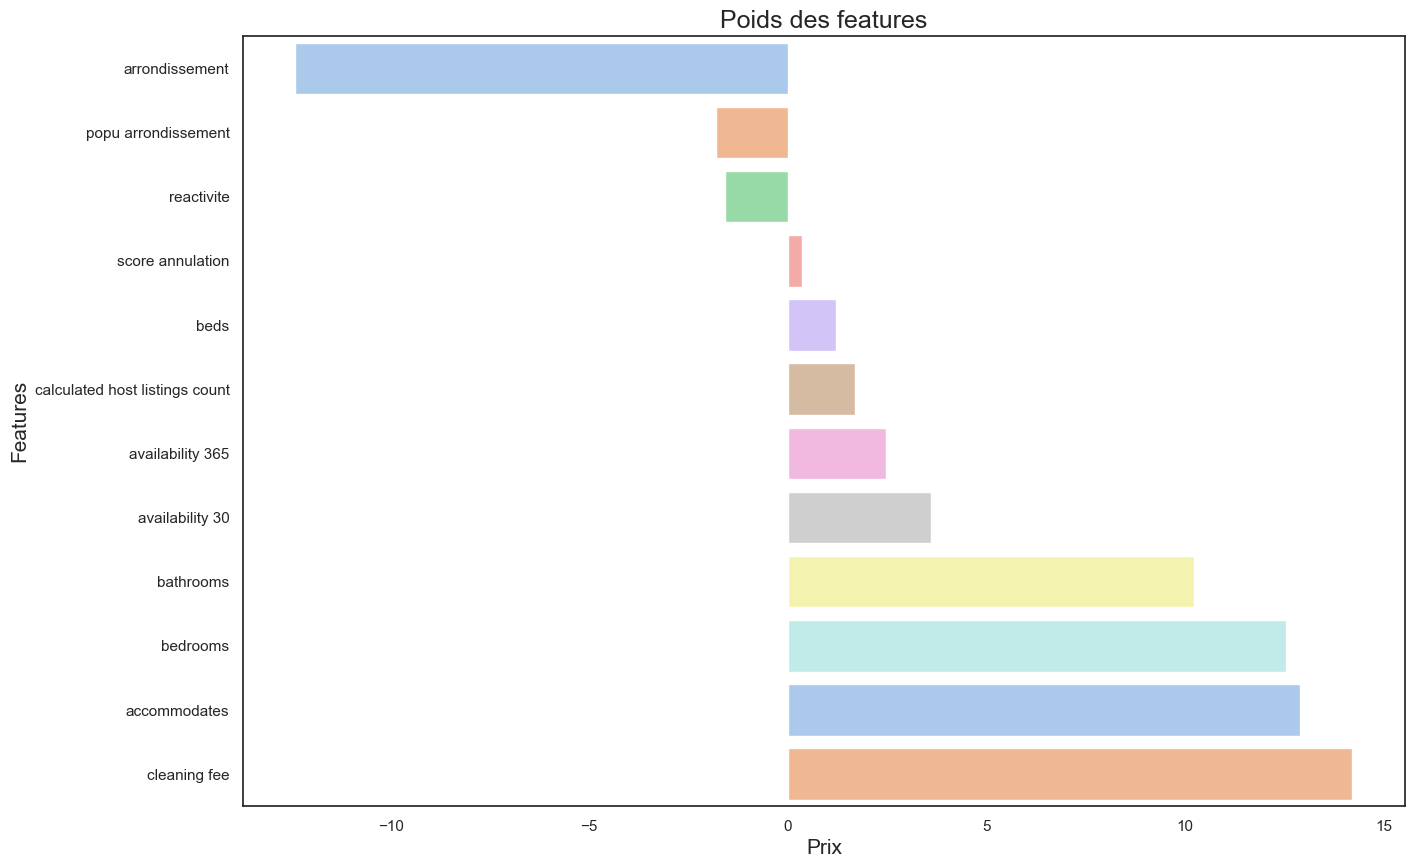

In [104]:
coef_list = sorted(list(zip(X_train.columns, lr.coef_)), key= lambda x : x[1])

x_values = [x[0] for x in coef_list]
y_values = [y[1] for y in coef_list]

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(x=y_values, y=x_values, palette=("pastel"))
#ax.set(xticks=xtick_list)
ax.set_title('Poids des features', size=18)
ax.set_xlabel('Prix', size=15)
ax.set_ylabel('Features', size=15)
plt.savefig('features', bbox_inches ='tight', dpi = 400)

In [105]:
coefs_df = pd.DataFrame(columns=['Feature', 'Coefficient'])
coefs_df['Feature'] = x_values
coefs_df['Coefficient'] = y_values
coefs_df.to_csv('lr_coefs.csv')
coefs_df

Feature  Coefficient
0                   arrondissement   -12.397352
1              popu arrondissement    -1.797942
2                       reactivite    -1.580191
3                 score annulation     0.344308
4                             beds     1.208371
5   calculated host listings count     1.701845
6                 availability 365     2.477069
7                  availability 30     3.599414
8                        bathrooms    10.223481
9                         bedrooms    12.543964
10                    accommodates    12.889019
11                    cleaning fee    14.210013

Comme vu précedemment, les frais de ménage, le nombre de chambre, la capacité d'accueil et la disponibilité sont des facteurs clés pour le prix. Cependant, nous gardons des réserves sur l'interprétation de la variable arrondissement : elle a réellement une influence, mais elle est assez dure à lire car les arrondissements sont classés de 1 à 20, mais cela ne reflète pas leur attractivité pour les clients Airbnb.

### 2.7 Modélisation avec XGBoost

On passe maintenant à une partie liée à la méthode de gradient boosting. On ne s'attachera pas trop à expliquer la théorie (cf cours du second semestre en 2A à l'ENSAE), mais cette méthode est censée donner de meilleurs modèles, plus précis et avec moins d'erreurs, en s'appuyant sur des arbres de décision. On prend des paramètres "classiques" puis on recherchera les meilleurs dans la partie suivante.

In [106]:
eval_set = [(X_val, y_val)]

In [107]:
gbm = xgb.XGBRegressor( 
                       n_estimators=10000, #arbitrary large number
                       max_depth=7,
                       objective="reg:squarederror",
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.6
                      )

eval_set=[(X_train,y_train),(X_val,y_val)] 

xgb_reg = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='mae',
                    early_stopping_rounds=20,
                    verbose=100 #gives output log as below
                   )

[0]	validation_0-mae:88.02681	validation_1-mae:85.19870
[49]	validation_0-mae:13.63872	validation_1-mae:21.68685


In [108]:
test_pred = xgb_reg.predict(X_test)
print('EMA du Test:', round(mean_absolute_error(y_test, test_pred),4))

EMA du Test: 22.6528


L'erreur moyenne absolue est plus basse que les modèles précedents ; le modèle est donc un peu plus précis.

### 2.8 GridSearchCV pour trouver les meilleurs paramètres

In [109]:

xgb_param_grid = {
    'max_depth': [5, 7, 9],
    'learning_rate': [0.1],
    'n_estimators': [1000],
    'colsample_bytree':[0.5,0.75],
    'colsample_bylevel':[0.25,0.5],  
}

xgb_gridsearch = GridSearchCV(xgb.XGBRegressor(),
                           xgb_param_grid,
                           cv=5,
                           n_jobs=-1)

xgb_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estim

In [110]:
best_xgb = xgb_gridsearch.best_estimator_

In [111]:
test_pred = best_xgb.predict(X_test)
print('EMA Test:', round(mean_absolute_error(y_test, test_pred),4))

EMA Test: 23.6403


L'erreur moyenne absolue trouvée est de 23.29 environ, c'est meilleur que ce que l'on a trouvé précedemment. Cohérent.
On obtient donc les paramètres optimaux suivants : 

In [112]:
best_xgb

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.25, colsample_bynode=1, colsample_bytree=0.75,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

On obtient, enfin, le tracé du "classement (poids)" de l'importance de 12 features avec XGBoost.

In [113]:
feat_df = pd.DataFrame(list(zip(X_train.columns, best_xgb.feature_importances_)), 
                       columns=['Feature', 'Weight'])

In [114]:
feat_df = feat_df.sort_values(by=['Weight'], ascending=False)

In [115]:
top_10 = feat_df.head(12)

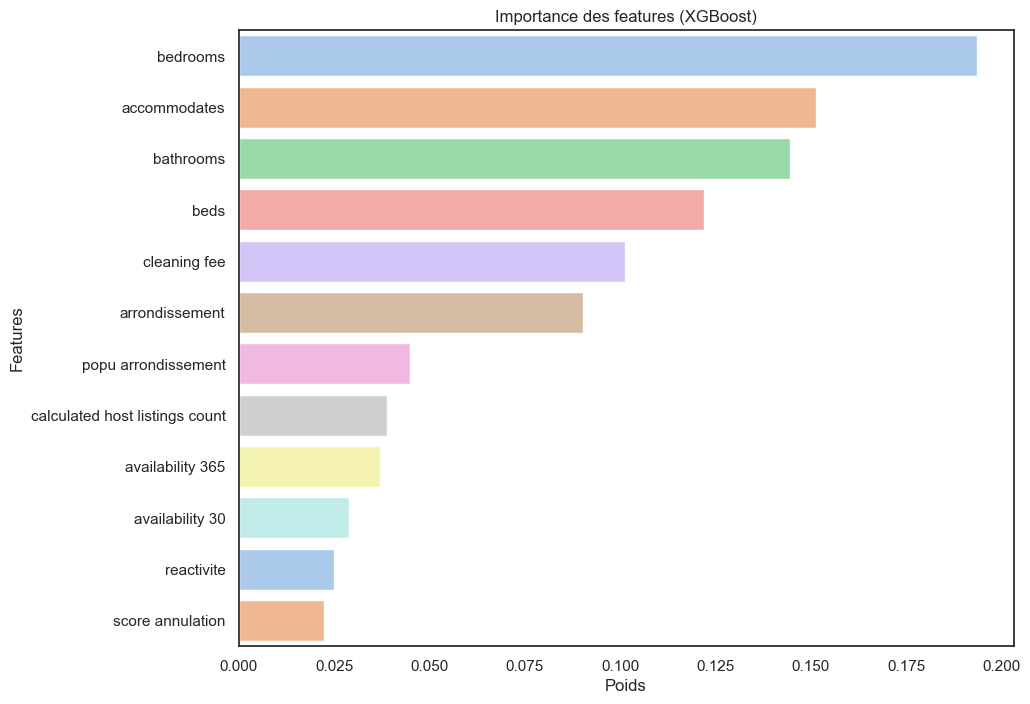

In [116]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=top_10['Weight'], y=top_10['Feature'], palette = "pastel")
plt.xlabel('Poids')
plt.ylabel('Features')
ax.set_title('Importance des features (XGBoost)');

Ensuite, on décide d'utiliser le module 'shap' pour encore mieux interpréter les outputs du modèle.

In [117]:
shap.initjs()
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_train)

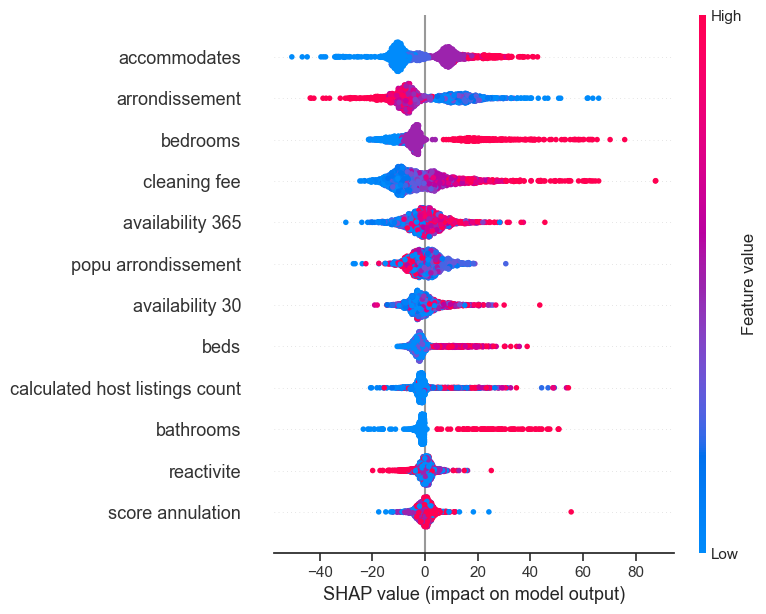

In [118]:
shap.summary_plot(shap_values, X_train,max_display=30)

Ce graphe nous apporte plusieurs informations : 
- chaque couleur représente la valeur d'une feature (basse ou haute)
- on voit horizontalement, pour chaque feature, la distripution des valeurs de Shapley, qui explique la contribution de chaque feature à la prédiction. 
Par exemple, une petite capacité d'accueil réduit la valeur prédite du prix par nuit, et à l'inverse une grande capacité l'augmente.
De même, une grande valeur de la variable 'réactivité' (qui est enfait le manque de réactivité, en vue de la façon dont cela a été codé) réduit le prix prédit, alors qu'une grande réactivité (donc petite valeur de 'réactivité') l'augmente.
C'est assez cohérent avec ce qui a été vu précedemment, et également assez cohérent avec la logique des réservations Airbnb.

In [119]:
X_display, y_display = shap.datasets.adult(display=True)

On calcule l'explainer expected value, qui correspond à la moyenne de l'output pour tous les inputs possibles.

In [120]:
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

Explainer expected value: 98.10725402832031


In [121]:
select = range(20,50)
features = X_test.iloc[select]
features_display = X_test.iloc[select]

In [122]:
shap_values = explainer.shap_values(features)[1]

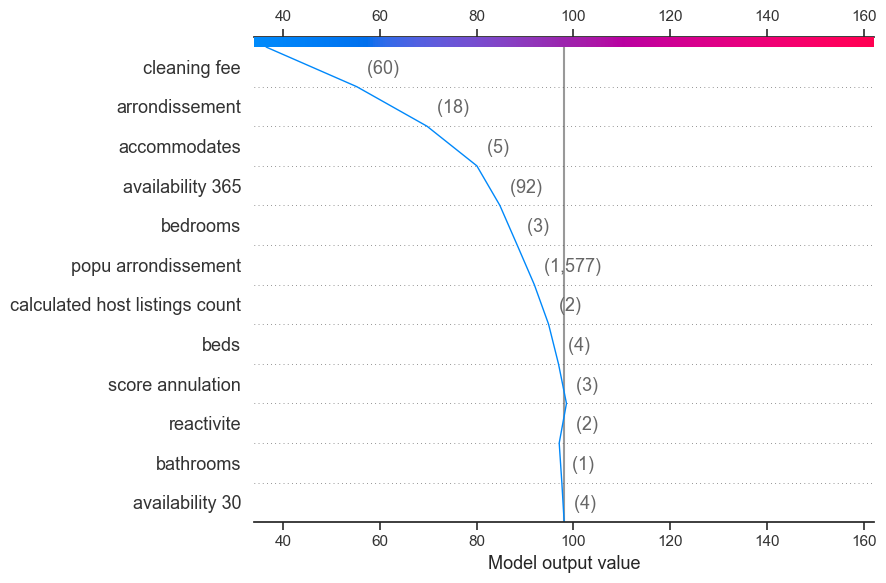

In [123]:
shap.decision_plot(expected_value, shap_values, features_display)

Ce graphique nous montre comment chaque feature contribue au prix prédit pour une nuit. Les observations convergent en bas du graphique, à la valeur "explainer.expected_value".


## 3. Amélioration du modèle

Jusqu'ici, nous avons négligé la colonne 'Amenities' par simplification. Cette variable contient toutes les caractéristiques plus spécifiques des appartements (accès à la Wifi, kitchenette, télévisions avec beaucoup de chaînes ou simplement TNT...), qui peuvent expliquer une hausse du prix d'un appartement.

In [134]:

df['Amenities'].describe()


count                                                 15508
unique                                                13077
top       TV,Cable TV,Internet,Wireless Internet,Kitchen...
freq                                                     33
Name: Amenities, dtype: object

Un premier problème apparaît lorsque l'on essaye d'exploiter la variable « amenities » : tous les équipements en question sont groupés en format texte pour chaque observation. Ainsi, pour chaque observation, on aimerait dans un premier temps créer une variable différente pour chaque équipement. Puis, dans un second temps, créer des indicatrices pour chaque variable.

In [135]:
#On commence par convertir la variable en format string 
df = df.astype({'Amenities' : 'string'})

In [137]:
# On sépare ensuite chacun des équipements pour chaque observation

def indic_amenities(s):
    return len(s.split(','))

df['num_Amenities'] = df['Amenities'].apply(indic_amenities)

In [138]:
Amenities = " ".join(list(df.Amenities))
Amenities = Amenities.replace('{', '')
Amenities = Amenities.replace('}', ',')
Amenities = Amenities.replace('"', '')
amenities_split = [x.strip() for x in Amenities.split(',')]
amenities_split = set(amenities_split)
amenities_tr = list(amenities_split)
amenities_tr

for k in amenities_tr :
    df[k] = df['Amenities'].str.contains(k).astype(int)


print(df.shape)


amenities_tr

(15508, 286)


['High chair Wireless Internet',
 'Lockbox Smoke detector',
 'Bathtub Cable TV',
 'Laptop friendly workspace Cable TV',
 'Children’s dinnerware TV',
 'Family/kid friendly Internet',
 'Buzzer/wireless intercom TV',
 'Baby bath',
 'Washer Kitchen',
 'Fireplace guards Cable TV',
 '24-hour check-in TV',
 'Lockbox Cable TV',
 'Carbon monoxide detector',
 'Pets live on this property',
 '24-hour check-in Wireless Internet',
 'Heating',
 'Iron Internet',
 'Washer Internet',
 'Cat(s)',
 'Hair dryer',
 'Hot tub',
 'Heating Internet',
 'Children’s dinnerware Internet',
 'Internet',
 'Washer TV',
 'Smartlock Cable TV',
 'Hangers Cable TV',
 'translation missing: en.hosting_amenity_49 Internet',
 'Private entrance Internet',
 'Iron Wireless Internet',
 'Buzzer/wireless intercom',
 'Lockbox Wireless Internet',
 'Wireless Internet',
 'Shampoo Kitchen',
 'Paid parking off premises',
 'Hair dryer Cable TV',
 'Iron translation missing: en.hosting_amenity_49',
 'Breakfast',
 'Lockbox',
 'TV',
 'Kitchen T

On obtient dès lors une liste d'éléments qui correspondent chacun à un équipement spécifique. Comme on va le vérifier juste après, ces variables sont désormais quantitatives : ce sont des indicatrices.

In [139]:
amenities_df = df.iloc[:,-10000:]
amenities_df['Price'] = df['Price']

In [140]:
amenities_df[['Internet', 'TV', 'Cable TV', 'Heating', 'Kitchen', 'Washer', 'Elevator in building']].head()

Internet  TV  Cable TV  Heating  Kitchen  Washer  Elevator in building
0          1   1         1        1        1       0                     0
8          1   1         0        1        1       1                     0
16         1   1         1        1        1       1                     0
19         1   1         1        1        1       1                     0
33         1   0         0        1        0       0                     0

Par exemple, on peut s'intéresser à l'influence du fait de posséder (ou non) les chaînes de télévision de la TNT sur le prix moyen de la nuit.

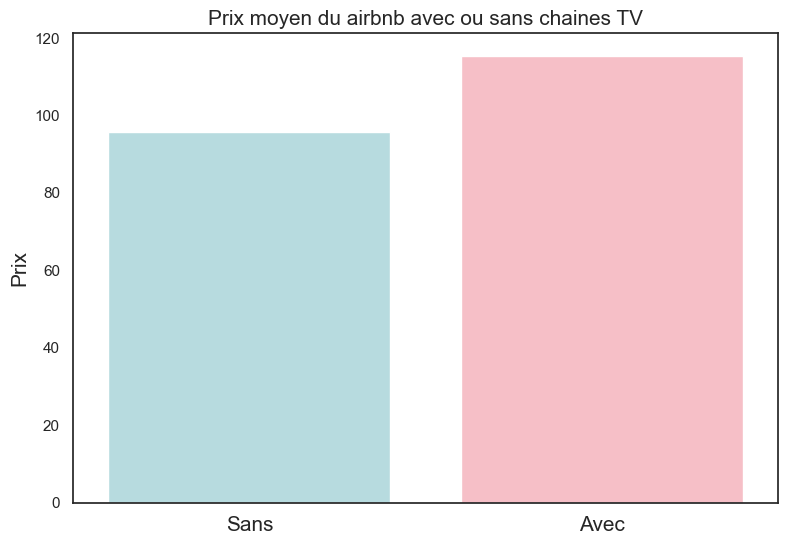

In [157]:
index = 1
fig = plt.figure(1, figsize=(20,50))
internet_amenities = amenities_tr[12:13]
colors = ['powderblue','lightpink']
for name in internet_amenities:
    
    current_axis = fig.add_subplot(7,2,index)
    pmoy0 = df[df[name] == 0]['Price'].mean()
    pmoy1 = df[df[name] == 1]['Price'].mean()

    x = ['Sans', 'Avec']
    y = [pmoy0, pmoy1]

    ax = sns.barplot(x=x, y=y, palette=colors);
    title = 'Prix moyen du airbnb avec ou sans chaines TV'
    ax.set_title(title, size=15)
    ax.set_xticklabels(['Sans', 'Avec'], size=15)
    ax.set_ylabel('Prix', size = 15)
    index +=1

Le résultat obtenu est certes qualitatif, mais il nous donne un premier aperçu de ce qui peut nous sembler assez intuitif : les logements les mieux équipés (ici, équipés d'une offre de chaînes de télévision) sont tendanciellement plus chers. Néanmoins, ces seules statistiques descriptives ne nous permettent pas de déterminer la significativité statistique du résultat. Pour ce faire, il faudrait de nouveau utiliser la modélisation de la partie précédente en intégrant tous les nouveaux éléments relatifs aux équipements. Certains écueils restent toutefois à éviter. En particulier, il faut faire attention à ne pas trop « surcharger » les modèles de régression standards, au risque d'induire des biais liés à l'overfitting. Dans ce cas là, les méthodes de régressions pénalisées (Lasso, Ridge) ou celles de gradient boosting (XGBoost) sont préférables.

# Conclusion 

Ce projet avait pour but de prédire les prix des Airbnb parisiens et de les comparer, dans une moindre mesure, aux loyers parisiens. Grâce à des statistiques descriptives, cartes interactives et analyses NLP, nous avons pu concevoir une idée des features qui influencaient le plus ces prix. 
Nous avons ensuite construit notre modèle, en nous appuyant sur diverses méthodes, certaines plus avantageuses mais aussi plus complexes que les autres.
Enfin, nous avons trouvé une piste d'amélioration de notre modèle, en incluant les équipements des appartements.
Dans l'idéal, nous pourrions inclure ces nouvelles features dans le modèle, même si les risques d'overfitting persistent dans le cas de régressions classiques.
Nous aurions aimé avoir des données plus récentes (la plupart ont été scrappées en avril 2017), pour voir l'évolution des prix depuis la pandémie du Covid-19. De même, les prix de l'immobilier provenant du scrapping que nous avons effectués sont des prix actuels. Nous nous interrogeons sur la pertinence de cette comparaison, mais pensons quand même que les prix sont restés relativement stables.
De plus, nous nous questionnons sur l'utilisation ou non de subsets dans la partie modélisation, mais pensons qu'ils sont quand même pertinents et plus faciles à manier.
Enfin, nous pensons avoir appliqué la majorité des points vus en cours, et sommes satisfaits d'avoir appris tout cela.
